# Pre procesamiento de Audios
---


# Audio a Tensores

## 0. importación

In [ ]:
!python --version

Python 3.7.10


Este notebook se creó con Python 3.7.10

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import librosa
import tensorflow as tf
from librosa import display
import IPython.display as ipd
import re
import scipy
import seaborn as sns
#import ipywidgets as widgets

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
cpus = tf.config.experimental.list_physical_devices('CPU')
print(f'lisata de gpus: {gpus}')
print(f'lisata de cpus: {cpus}')
tf.config.set_visible_devices(cpus[0], 'CPU') # unhide the CPU
tf.config.set_visible_devices(gpus[0], 'GPU') # unhide potentially hidden GPU
tf.config.get_visible_devices()

lisata de gpus: []
lisata de cpus: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


IndexError: ignored

In [ ]:
nombre_gpu = tf.test.gpu_device_name()
if nombre_gpu != '/device:GPU:0':
  raise SystemError('GPU no encontrada')
print('GPU encontrada: {}'.format(nombre_gpu))

SystemError: ignored

In [ ]:
!python --version
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
#print('Matplotlib', plt.__version__)
#print('os', os.__version__)
print('librosa', librosa.__version__)
print('tensorflow', tf.__version__)
print('re', re.__version__)
print('scipy', scipy.__version__)

Python 3.7.10
NumPy 1.19.5
Pandas 1.1.5
librosa 0.8.0
tensorflow 2.4.1
re 2.2.1
scipy 1.4.1


Este notebook se creó con estas versiones de módulos:
> Python 3.7.10

> NumPy 1.19.5

> Pandas 1.1.5

> librosa 0.8.0

> scipy 1.4.1

In [7]:
#si esta trabajando en google drive
from google.colab import drive
drive.mount('/content/drive')

pathdir = '/content/drive/MyDrive/Colab Notebooks/IA y AP/Proyecto/Audios/'
listdir = os.listdir(pathdir)
print(f'Cantidad de audios: {len(listdir)}')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Cantidad de audios: 1697


In [ ]:
#si esta trabajando en local
#pathdir = '/home/mofoko/Desktop/Diplomato intel artificial/IA y AP/Proyecto/Audios/Audios/'

#listdir = os.listdir(pathdir)
#print(f'Cantidad de audios: {len(listdir)}')

## Tasa de Sampleo
---
La Tasa de Sampleo en un audio es igual a la cantidad de puntos muestreados dividido la duración del audio:

$$sr = \frac{y}{t}$$

Donde $sr$ o *sample rate* $pt/s$ pts muestreado por segundo (si lo vemos desde el punto de vista físico $v=\frac{x}{t}$ es la velocidad ($v$)), $y$ es el vector de puntos muestreados del audio (equivalente a una distancia ($x$)) y $t$ es la duración del audio o el tiempo.

La función *load()* del modulo *librosa* nos da $sr$ y $y$.

In [ ]:
from sklearn import preprocessing
#Correr esta celda solo si nunca a creado el df_full y ya este en local
def get_metadata(pathdir):
  """
  Esta función recibe la ruta de la carpeta y 
  retorna un data frame con la metadata de 
  todos los audios de cetáceos.
  """
  listdir = os.listdir(pathdir)
  dic = {}
  dic['Cetáceo'] = []
  dic['Duración'] = []
  dic['mean'] = []
  dic['std'] = []
  dic['A max'] = []
  dic['A min'] = []
  dic['número'] = []

  count = 0
  for audio in listdir:
      count += 1
      y, sr = librosa.load(pathdir+audio)
      duration = len(y)/float(sr)
      split_name = re.split(r'(\d*\.)', audio, maxsplit=2)
      split_name[1] = int(re.sub(r'[\.]', '', split_name[1]))
      dic['Cetáceo'].append(split_name[0])
      dic['número'].append(split_name[1])
      dic['Duración'].append(duration)
      dic['mean'].append(y.mean())
      dic['std'].append(y.std())
      dic['A max'].append(max(y))
      dic['A min'].append(min(y))
              
      if count%100 == 0:
          print(f'iteración: {count}')
  dic['etiqueta'] = preprocessing.LabelEncoder().fit_transform(dic['Cetáceo'])
  df_full = pd.DataFrame.from_dict(dic)
  return df_full

In [ ]:
df_metadata = get_metadata(pathdir)
df_metadata

iteración: 100
iteración: 200
iteración: 300
iteración: 400
iteración: 500
iteración: 600
iteración: 700
iteración: 800
iteración: 900
iteración: 1000
iteración: 1100
iteración: 1200
iteración: 1300
iteración: 1400
iteración: 1500
iteración: 1600


,Cetáceo,Duración,mean,std,A max,A min,número,etiqueta
0,Humpback Whale,7.559773,0.003545,0.047868,0.192322,-0.167431,44,12
1,Humpback Whale,17.200272,0.003582,0.068254,0.274714,-0.407344,45,12
2,Humpback Whale,15.449841,0.003497,0.074636,0.274181,-0.436547,46,12
3,Humpback Whale,1.668209,-0.004282,0.055839,0.195271,-0.225767,47,12
4,Humpback Whale,29.592698,0.003512,0.017186,0.134896,-0.138159,48,12
...,...,...,...,...,...,...,...,...
1692,Humpback Whale,14.027664,0.004184,0.043706,0.109213,-0.187592,39,12
1693,Humpback Whale,11.193243,0.004198,0.042371,0.108955,-0.218471,40,12
1694,Humpback Whale,13.003492,0.003710,0.115203,0.280783,-0.616953,41,12
1695,Humpback Whale,27.747664,0.004184,0.152778,0.311816,-0.644217,42,12


In [ ]:
#df_full.to_csv (r'/home/mofoko/Desktop/Diplomato intel artificial/IA y AP/Proyecto/Audios/df_cetace.csv', index = False, header=True) #en local
df_metadata.to_csv (r'/content/drive/MyDrive/Colab Notebooks/IA y AP/Proyecto/df_metadata.csv', index = False, header=True) #en drive


In [ ]:
#Para no volver a crear el df_full solo lo cargamos desde local
#df_full = pd.read_csv (r'/home/mofoko/Desktop/Diplomato intel artificial/IA y AP/Proyecto/Audios/df_cetace.csv') #en local
df_full = pd.read_csv (r'/content/drive/MyDrive/Colab Notebooks/IA y AP/Proyecto/df_metadata.csv') #en drive

In [ ]:
df_full['Cetáceo'].value_counts()

Spinner Dolphin                       114
Fraser's Dolphin                       87
Striped Dolphin                        81
Sperm Whale                            75
Long-Finned Pilot Whale                70
Grampus, Risso's Dolphin               67
Short-Finned (Pacific) Pilot Whale     67
Pantropical Spotted Dolphin            66
Humpback Whale                         64
Melon Headed Whale                     63
Clymene Dolphin                        63
Bowhead Whale                          60
False Killer Whale                     59
Atlantic Spotted Dolphin               58
White-beaked Dolphin                   57
White-sided Dolphin                    55
Northern Right Whale                   54
Common Dolphin                         52
Beluga, White Whale                    50
Rough-Toothed Dolphin                  50
Ross Seal                              50
Narwhal                                50
Fin, Finback Whale                     50
Harp Seal                         

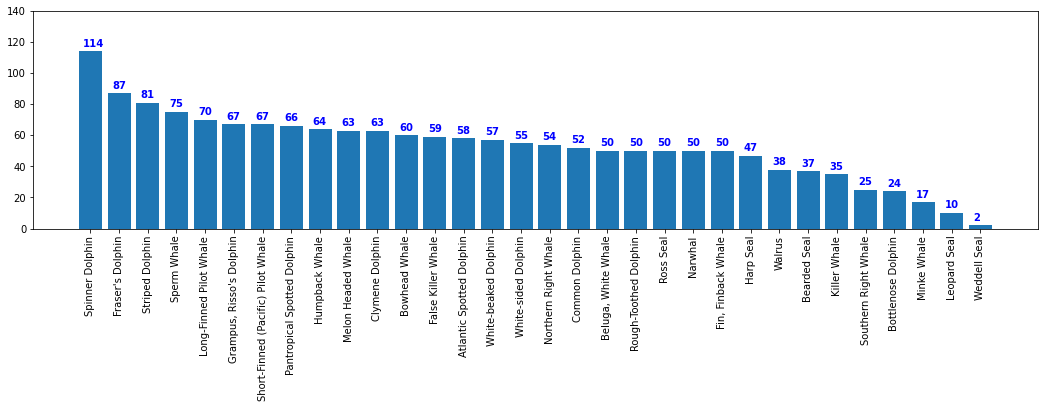

In [ ]:
plt.figure(figsize=(18,4))
plt.bar(df_full['Cetáceo'].value_counts().index, height=df_full['Cetáceo'].value_counts())
plt.xticks(rotation=90)
plt.yticks(range(0, 160, 20));
for i, v in enumerate(df_full['Cetáceo'].value_counts()):
    plt.text(i-0.25, v + 3, str(v), color='blue', fontweight='bold')


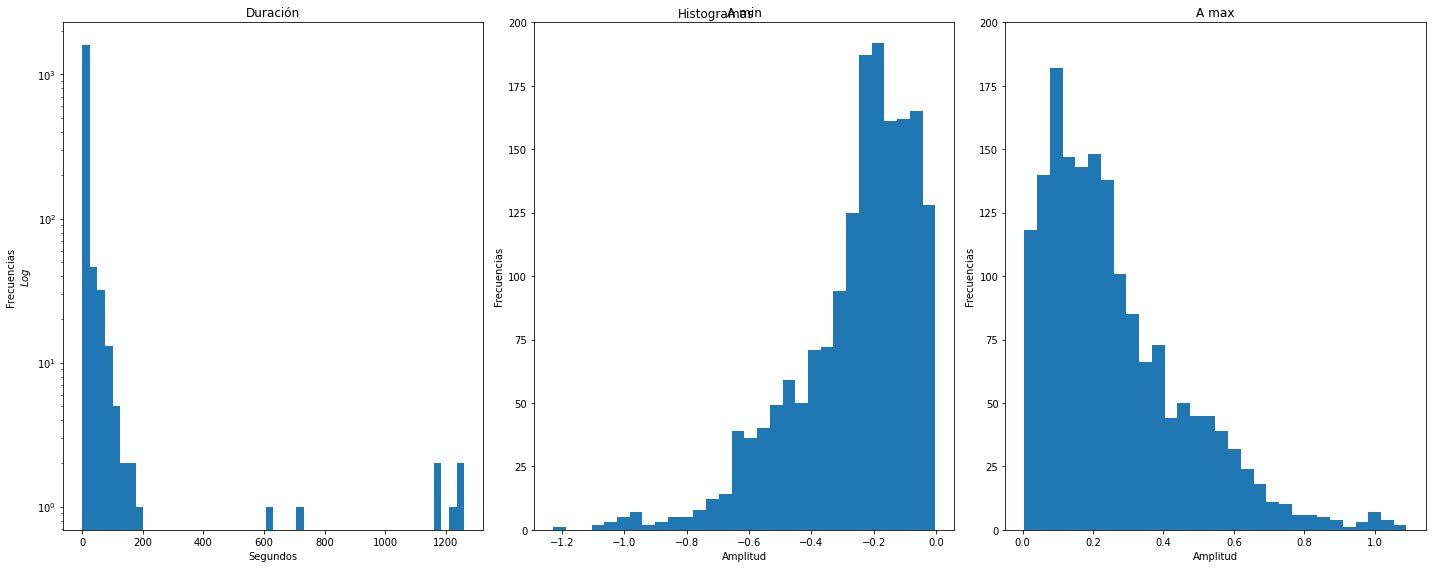

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(20, 8))
fig.suptitle('Histogramas')
ax[0].hist(df_full['Duración'], bins= 50)
ax[0].set_title('Duración')
ax[0].set_xlabel('Segundos')
ax[0].set_ylabel('Frecuencias \n$Log$ ')
#plt.ylim(0.0, 20.0)
ax[0].set_yscale('log');

ax[1].hist(df_full['A min'], bins= 30)
ax[1].set_title('A min')
ax[1].set_xlabel('Amplitud')
ax[1].set_ylabel('Frecuencias')
ax[1].set_ylim(0.0, 200.0)

ax[2].hist(df_full['A max'], bins= 30)
ax[2].set_title('A max')
ax[2].set_xlabel('Amplitud')
ax[2].set_ylabel('Frecuencias')
ax[2].set_ylim(0.0, 200.0)



fig.tight_layout()

#plt.hist(df_full['Duración'], bins= 50)
#plt.title('Duración')
#plt.xlabel('Segundos')
#plt.ylabel('Log scale')
#plt.ylim(0.0, 20.0)
#plt.yscale('log');

(0.0, 700.0)

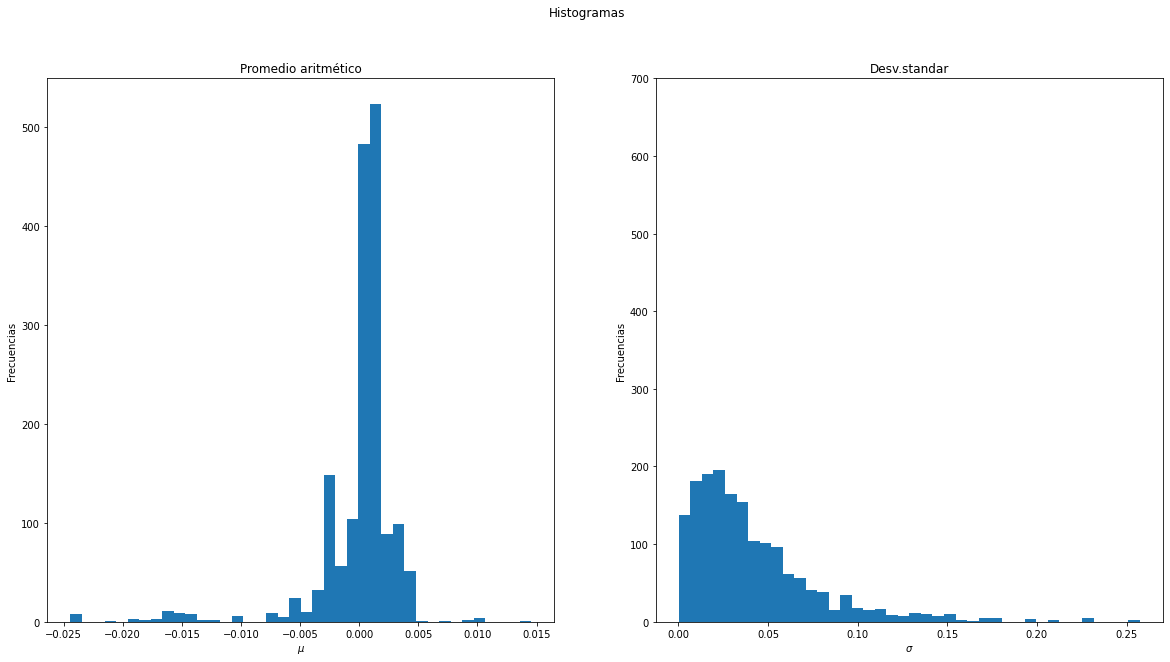

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(20, 10))
fig.suptitle('Histogramas')
ax[0].hist(df_full['mean'], bins= 40)
ax[0].set_title('Promedio aritmético')
ax[0].set_xlabel('$\mu$')
ax[0].set_ylabel('Frecuencias')
plt.ylim(0.0, 700.0)
#ax[0].set_yscale('log');

ax[1].hist(df_full['std'], bins= 40)
ax[1].set_title('Desv.standar')
ax[1].set_xlabel('$\sigma$')
ax[1].set_ylabel('Frecuencias')
ax[1].set_ylim(0.0, 700.0)

In [ ]:
df_full['Duración'].describe()

count    1697.000000
mean       10.429681
std        71.244984
min         0.053696
25%         1.130975
50%         1.700816
75%         3.234785
max      1260.000000
Name: Duración, dtype: float64

In [ ]:
#Audios con duración mayor a 15 min
df_full[(df_full['Duración'] >= 1000)]

,Cetáceo,Duración,mean,std,A max,A min
526,Short-Finned (Pacific) Pilot Whale41.mp4,1260.000000,-0.000016,0.051939,0.974584,-0.971377
588,Sperm Whale11.mp4,1162.098322,-0.000015,0.021579,1.089886,-0.934924
602,Sperm Whale25.mp4,1260.000000,-0.000016,0.051939,0.974584,-0.971377
651,Sperm Whale74.mp4,1220.100680,-0.000014,0.085791,1.032048,-1.098023
652,Sperm Whale75.mp4,1179.215374,-0.000015,0.032819,1.046422,-1.080822


In [ ]:
#Audios con duración entre 5 y 15 min
df_full[(df_full['Duración'] <= 1000) & (df_full['Duración'] >= 400)]

,Cetáceo,Duración,mean,std,A max,A min
1678,Humpback Whale25.mp4,625.540635,0.004200,0.033995,0.111877,-0.226587
1688,Humpback Whale35.mp4,709.056780,0.004191,0.038382,0.114005,-0.227547


In [ ]:
#Audios con un promedio muy bajo o muy alto
df_full[(df_full['mean'] <= -0.010) | (df_full['mean'] >= 0.006)]

,Cetáceo,Duración,mean,std,A max,A min
56,Leopard Seal1.mp4,5.474240,-0.018904,0.053778,0.191618,-0.246701
57,Leopard Seal2.mp4,2.605805,-0.018768,0.063363,0.242937,-0.256183
58,Leopard Seal3.mp4,5.171202,-0.018305,0.046251,0.423137,-0.343706
59,Leopard Seal4.mp4,2.401633,-0.017014,0.081121,0.244336,-0.306413
60,Leopard Seal5.mp4,7.236417,-0.016944,0.046660,0.195466,-0.229003
...,...,...,...,...,...,...
1655,Humpback Whale2.mp4,9.689615,0.010340,0.051371,0.272818,-0.273762
1656,Humpback Whale3.mp4,9.144853,0.010450,0.083962,0.522001,-0.458969
1657,Humpback Whale4.mp4,9.559365,0.008999,0.094492,0.481410,-0.531458
1658,Humpback Whale5.mp4,27.432925,0.009976,0.076062,0.392849,-0.380915


In [ ]:
#Audios con desviaciones estandar altas
df_full[(df_full['std'] >= 0.18)]

,Cetáceo,Duración,mean,std,A max,A min
205,Minke Whale7.mp4,1.418005,-0.002230,0.198871,0.997324,-0.710706
289,Northern Right Whale24.mp4,2.157642,0.001580,0.255344,0.478180,-0.623931
290,Northern Right Whale25.mp4,2.182404,0.002761,0.257495,0.473166,-0.608960
291,Northern Right Whale26.mp4,2.108027,0.002485,0.210699,0.419974,-0.493308
292,Northern Right Whale27.mp4,2.380816,0.002157,0.226799,0.484312,-0.619523
293,Northern Right Whale28.mp4,2.406032,0.001815,0.229086,0.485714,-0.630736
294,Northern Right Whale29.mp4,2.455238,0.001156,0.226053,0.475583,-0.483173
295,Northern Right Whale30.mp4,2.058413,0.002251,0.226747,0.461091,-0.490707
1092,Bearded Seal35.mp4,3.618776,-0.003408,0.195490,0.651997,-0.671078
1158,Bottlenose Dolphin14.mp4,1.500000,-0.003111,0.211098,0.613933,-0.611669


### Audios 6.6 min

In [ ]:
#Audios con duración mayor a 6.6 min
df_full[(df_full['Duración'] >= 400)]

,Cetáceo,Duración,mean,std,A max,A min
526,Short-Finned (Pacific) Pilot Whale41.mp4,1260.000000,-0.000016,0.051939,0.974584,-0.971377
588,Sperm Whale11.mp4,1162.098322,-0.000015,0.021579,1.089886,-0.934924
602,Sperm Whale25.mp4,1260.000000,-0.000016,0.051939,0.974584,-0.971377
651,Sperm Whale74.mp4,1220.100680,-0.000014,0.085791,1.032048,-1.098023
652,Sperm Whale75.mp4,1179.215374,-0.000015,0.032819,1.046422,-1.080822
1678,Humpback Whale25.mp4,625.540635,0.004200,0.033995,0.111877,-0.226587
1688,Humpback Whale35.mp4,709.056780,0.004191,0.038382,0.114005,-0.227547


In [ ]:
idx_to_drop = df_full[(df_full['Duración'] >= 400)].index
df_6min = df_full.drop(idx_to_drop)
df_6min['Duración'].describe()


count    1690.000000
mean        6.084708
std        15.987984
min         0.053696
25%         1.126519
50%         1.698186
75%         3.182778
max       187.345306
Name: Duración, dtype: float64

In [ ]:
df_6min['Duración'].max() #audio mas largo dentro de los de 6.6 min

187.345306122449

In [ ]:
df_6min[df_6min['Duración']==187.345306122449]

,Cetáceo,Duración,mean,std,A max,A min
504,Short-Finned (Pacific) Pilot Whale19.mp4,187.345306,-0.000126,0.04278,0.390534,-0.400592


## Sample rate vs Duración
---
Al parecer la tasa de muestreo no cambia la duración del audio

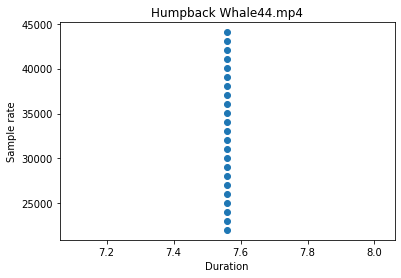

In [ ]:
# Ruta local
#filename = '/home/mofoko/Desktop/Diplomato intel artificial/IA y AP/Proyecto/Audios/Audios/'+listdir[0]
#ruta drive
filename = pathdir+listdir[0]
SR = []
t = []
for i in range(22050, 44100, 1000):
    y, sr = librosa.load(filename, sr=i)
    duration = len(y)/float(sr)
    SR.append(i)
    t.append(duration)

plt.scatter(t, SR)
plt.title(f'{listdir[0]}')
plt.xlabel("Duration")
plt.ylabel("Sample rate")
plt.xlim(np.array(t).mean()-0.5, np.array(t).mean()+0.5);

In [ ]:
df= pd.DataFrame(t, columns=['Duration'])
df['sr']= SR

df.head()

,Duration,sr
0,7.559773,22050
1,7.559740,23050
2,7.559751,24050
3,7.559760,25050
4,7.559770,26050


## Calcular vector de tiempos
---

Si apartir de la tasa de muestreo $22050 pt/s$ que es la tasa de muestreo por defecto de *librosa*, pensaramos como es la longitud de los pasos que se deben dar en el eje x para muestrear $22050$ puntos en un segundo, entonces esta sería longitud sería $\frac{1}{22050}$ = 0.000045 segundos en cada paso por lo que si son 47029 puntos entonces el timepo del punto 47029 sería $47029 * \frac{1}{22050}$, así calculamos el tiempo para cada punto.


In [ ]:
#vuelve el sampling a data frame
df = pd.DataFrame(y, columns=['Amplitude'])

df['segundos'] = list(map(lambda x : x/sr,range(len(df.index))))

df.tail()


,Amplitude,segundos
333002,0.022177,7.559637
333003,0.020037,7.559659
333004,0.014606,7.559682
333005,0.007502,7.559705
333006,0.000000,7.559728


## Audio más largo y sr
---
Para definir un tamaño estandar para los vectores de amplitud es necesario definir la menor tasa de sampleo sr para que el audio más largo (Sperm Whale25.mp4 con duración de 1260.0 s) produzca el vector $y$ más pequeño posible esto con el fin de que el tensor al final sea lo más pequeño posible esto con el fin de que los calculos no sean tan grandes.

**Corrección 08/05/2021**
con un audio tan grande como el de Sperm Whale25.mp4 con duración de 1260.0 s) la red densa daba 7,015,712 parámetros lo cual es demasiado por lo que se opta por sólo usar los audios menores a 6.6 min, así el audio más largo ahora es: Short-Finned (Pacific) Pilot Whale19.mp4	con duración de 187.345306 s

In [ ]:
# Cargamos el audio
###### PARAMETRO #####
idx_mas_largo = 504 # indice del audio más largo para calcular la sr desúes
######################

y, sr = librosa.load(pathdir+listdir[idx_mas_largo], sr=119) 

######################
#  sr=119 #parece ser la tasa sr que produce el vector más pequeño
#  len(y)= 22295 #tamaño estandar para y
######################

# 3. Run the default beat tracker
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
duration = len(y)/float(sr)

print(f'{listdir[idx_mas_largo]}')
print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

# 4. Convert the frame indices of beat events into timestamps
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

print(f'Amplitudes (y): {y} \ny cantidad/longitud de y: {len(y)}')
print(f'Tasa de sampleo (sr): {sr}')
print(f'Duración del audio: {duration}')

#ya no es posible graficar la señal por el sr tan pequeño que hace que el hop sea menor a cero
#fig, ax = plt.subplots(nrows=1, sharex=True, sharey=True)
#librosa.display.waveplot(y, sr=sr, ax=ax)
#ax.set(title=f'{listdir[989]}')


Short-Finned (Pacific) Pilot Whale19.mp4
Estimated tempo: 0.00 beats per minute
Amplitudes (y): [ 0.00254838  0.00193633  0.00030032 ...  0.00659375 -0.0014869
  0.        ] 
y cantidad/longitud de y: 22295
Tasa de sampleo (sr): 119
Duración del audio: 187.35294117647058


/usr/local/lib/python3.7/dist-packages/librosa/filters.py:239: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  "Empty filters detected in mel frequency basis. "


## Variar sr para mantener constante len(y)
---

Dado que el longitud de $y$ se definió como 109620 y se conoce la duración de los audios como $t = \frac{y}{sr}$
entonces es posible calcular el $sr$ para cada uno de los 1697 audios  para que el vector de amplitudes $y$ sea siempre 109620. 

**08/05/2021**
Se cambió la longitud delvector de amplitudes $y$ para que siempre sea 22295 

In [ ]:
###### PARAMETRO #######
len_y = 22295 #es la menor longitud de filas que se va a definir como longitud constante para los tensores
########################

cetaceo = listdir[0]
y_1, sr_1 = librosa.load(pathdir+cetaceo)
duration = len(y_1)/sr_1
sr = len_y/duration 
y_1 = librosa.resample(y_1, sr_1, sr)

df_1 = pd.DataFrame(y_1, columns=['Amplitude'])
df_1['segundos'] = list(map(lambda x : x/sr_1,range(len(df_1.index))))
T = df_1.values[np.newaxis, :, :]
print(f'{cetaceo} \n=========================\n')
print(f'Tasa de muestreo (sr): {sr_1}')
print(f'Cantidad de pts: {len(y_1)}')
print(f'Duración: {duration}')
print(f'Forma del tensor: {T.shape}')
print(type(sr_1))

Humpback Whale44.mp4 

Tasa de muestreo (sr): 22050
Cantidad de pts: 22295
Duración: 7.559773242630386
Forma del tensor: (1, 22295, 2)
<class 'int'>


### Eliminar mayores a 6,6 min

In [ ]:
idx_to_remove = list(df_full[(df_full['Duración'] >= 400)].index)
listdir_6min = pd.Series(listdir).drop(idx_to_remove).tolist()
print(f'Nuevo shape de listdir: {len(listdir_6min)}')


Nuevo shape de listdir: 1690


## Display
---

In [ ]:
import wave

data = wave.open(pathdir+listdir[n], mode = 'rb')
params = data.getparams()
print(params) #todos los audios son mono

_wave_params(nchannels=1, sampwidth=2, framerate=81600, nframes=190236, comptype='NONE', compname='not compressed')


In [ ]:
from numpy.random import randint
from scipy.fft import fft

def plot_audio(audio_random, new_sr= None):
  """
  Esta función toma la ruta del audio y
  entrega 4 graficas:
  1. Amplitud vs tiempo
  2. Espectograma Transformada de Furier corta
  3. Angulo de numeros complejos
  4. Espectograma en escala de Mel
  """
  ################ plot Amplitud vs. tiempo ##########
  #original
  if new_sr == None:
    get_sr = librosa.get_samplerate(audio_random)
    y, sr = librosa.load(audio_random, sr= get_sr, res_type='kaiser_fast')
  else:
    get_sr = librosa.get_samplerate(audio_random)
    y, sr = librosa.load(audio_random, sr= get_sr, res_type='kaiser_fast')
    new_y = librosa.resample(y, sr, new_sr)
    y, sr = new_y, new_sr

  fig, ax = plt.subplots(2, 2, figsize=(18, 7))
  #plt.title(f'{listdir[n]}')
  fig.suptitle(f'{listdir[n]}', fontsize=16, y=1.05, fontweight='bold')
  print(listdir[n])
  librosa.display.waveplot(y, sr= sr, ax= ax[0, 0])
  ax[0, 0].set_title('Amplitud vs. tiempo')

  ############# plot espectograma ############
  #angulos de complejos
  hop_length = 512
  n_fft = 1024 # frame length 
  #Short-Time-Fourier-Transform
  stft = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
  #Separar resultado en parte de magnitud y fase
  stft_magnitude, stft_phase = librosa.magphase(stft)
  # Pasar amplitud a decibeles para espectrograma
  stft_magnitude_db = librosa.amplitude_to_db(stft_magnitude, ref=np.max)
  #Mostrar Espectrograma
  librosa.display.specshow(stft_magnitude_db, x_axis='time', y_axis='linear', 
                          sr=sr, hop_length=hop_length, ax= ax[0, 1])
  ax[0, 1].set_title('stft spectogram')
  
  ############### Transf. Fourier #####################
  Tfy = np.real(fft(y))
  #Dominio de Frecuencias
  N=len(y)
  xf = np.linspace(0.0, 1.0/(2.0*1/sr), N//2)
  ax[1, 0].plot(xf, 2.0/N *np.abs(Tfy[0:N//2]));
  ax[1, 0].set_xlabel('Frequency (Hz)')
  ax[1, 0].set_title('fft')

  ############### mel spectogram ############
  # number of mel frequency bands 
  n_mels = 100
  fmin = 0            
  fmax = 22050 # sample_rate/2
  mel_spec = librosa.feature.melspectrogram(y, n_fft=n_fft, hop_length=hop_length,
                                            n_mels=n_mels, sr= sr, power=1.0,
                                            fmin=fmin, fmax=fmax)
  mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.max)
  img=librosa.display.specshow(mel_spec_db, x_axis='time',  y_axis='mel', 
                          sr=sr, hop_length=hop_length, 
                          fmin=fmin, fmax=fmax, ax=ax[1, 1])
  ax[1, 1].set_title('Mel spectogram')
  plt.tight_layout();

Harp Seal11.mp4


/usr/local/lib/python3.7/dist-packages/librosa/filters.py:239: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  "Empty filters detected in mel frequency basis. "


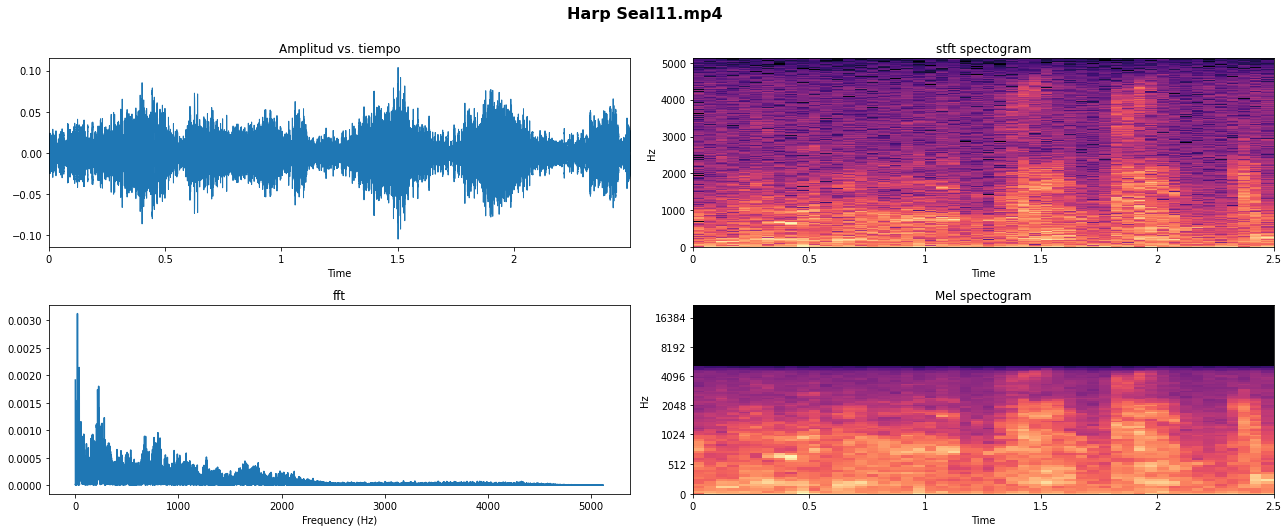

In [ ]:
n = randint(0, len(listdir))
audio_random = pathdir+listdir[n]
plot_audio(audio_random)
get_sr = librosa.get_samplerate(audio_random)
y, sr = librosa.load(audio_random, sr= get_sr)
ipd.Audio(y, rate=sr)


Spinner Dolphin79.mp4


/usr/local/lib/python3.7/dist-packages/librosa/filters.py:239: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  "Empty filters detected in mel frequency basis. "


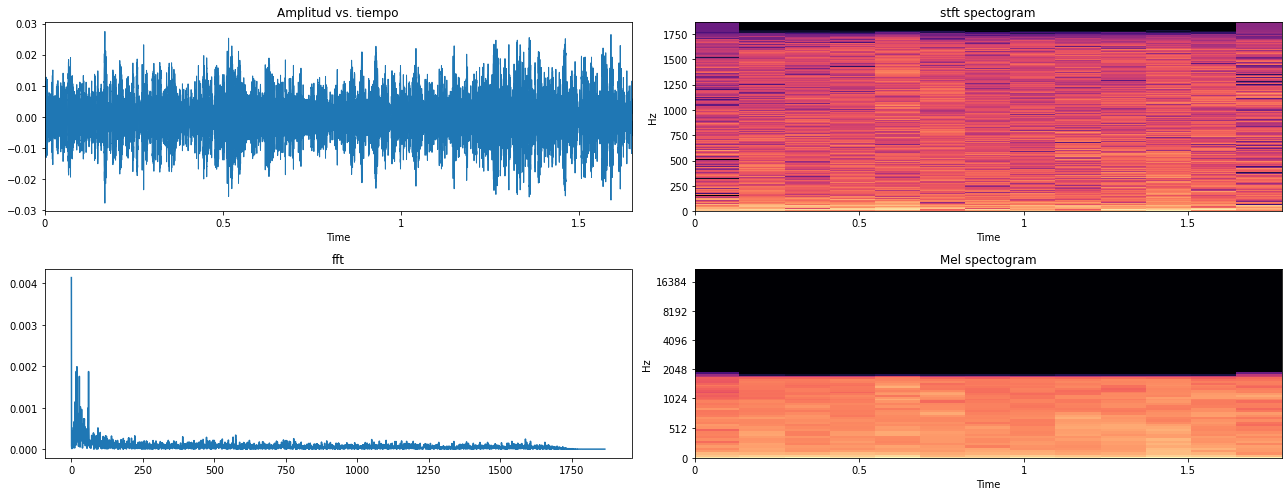

In [ ]:
###### PARAMETRO #######
len_y = 22295 #es la menor longitud de filas que se va a definir como longitud constante para los tensores
########################
#resampleada
#resampleada
duration = librosa.get_duration(y)
new_sr = int(len_y/duration)
plot_audio(audio_random, new_sr= new_sr)

get_sr = librosa.get_samplerate(audio_random)
y, sr = librosa.load(audio_random, sr= get_sr)
new_y = librosa.resample(y, sr, new_sr)
ipd.Audio(new_y, rate=new_sr)

In [ ]:
audio_random = pathdir+listdir[n]
plot_audio(audio_random)

In [ ]:
pd.DataFrame(mel_spec_db)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265
0,-47.784870,-56.037731,-48.284847,-54.024761,-37.831448,-37.347950,-45.926197,-68.284851,-46.975811,-52.720436,-40.871490,-31.103197,-40.750088,-40.881519,-39.069195,-52.042744,-52.560677,-45.752636,-42.449596,-39.180435,-40.509308,-42.686848,-40.675926,-39.066189,-41.462502,-37.123566,-44.714657,-44.630939,-46.077290,-45.887054,-57.103970,-48.760109,-39.919018,-41.842278,-51.026478,-56.079563,-42.913776,-47.258244,-44.801792,-52.079208,...,-33.031891,-32.269905,-42.826275,-40.732738,-44.531239,-52.500519,-60.427830,-40.625622,-39.166348,-42.561424,-42.237747,-43.593746,-46.615276,-53.629261,-32.769455,-42.157658,-42.046608,-36.045910,-34.656342,-36.194595,-33.208241,-31.274458,-35.825787,-37.707981,-38.142391,-45.928646,-46.280121,-42.000351,-40.590244,-39.430298,-38.057220,-42.930168,-42.758709,-42.517300,-42.063034,-35.255566,-41.281971,-34.452023,-36.181446,-40.729160
1,-16.681679,-24.934538,-17.181654,-22.921568,-6.728256,-6.244754,-14.823002,-37.181652,-15.872620,-21.617243,-9.768299,0.000000,-9.646893,-9.778324,-7.966000,-20.939550,-21.457483,-14.649439,-11.346403,-8.077244,-9.406115,-11.583652,-9.572729,-7.962997,-10.359306,-6.020372,-13.611464,-13.527748,-14.974096,-14.783861,-26.000776,-17.656912,-8.815826,-10.739086,-19.923285,-24.976366,-11.810579,-16.155050,-13.698601,-20.976017,...,-1.928695,-1.166710,-11.723080,-9.629545,-13.428047,-21.397327,-29.324636,-9.522429,-8.063154,-11.458233,-11.134556,-12.490549,-15.512083,-22.526064,-1.666261,-11.054464,-10.943413,-4.942713,-3.553149,-5.091400,-2.105046,-0.171261,-4.722590,-6.604787,-7.039194,-14.825453,-15.176929,-10.897156,-9.487049,-8.327106,-6.954028,-11.826973,-11.655512,-11.414103,-10.959843,-4.152371,-10.178780,-3.348828,-5.078248,-9.625965
2,-69.887711,-44.956944,-46.421761,-53.674545,-31.564562,-38.148418,-45.383930,-47.109859,-48.564682,-51.301426,-55.164497,-28.211016,-47.709499,-46.741589,-46.120586,-53.926121,-47.787308,-53.006458,-32.539951,-47.602692,-46.806435,-43.373829,-43.646187,-54.326843,-49.294010,-30.137152,-44.895168,-45.056515,-48.698238,-58.677990,-45.354485,-39.332169,-36.417664,-46.450180,-59.085896,-56.743458,-43.019634,-48.289997,-37.310188,-39.945835,...,-37.802658,-32.321480,-46.238083,-54.318943,-45.096630,-51.957180,-48.347569,-29.734957,-39.825230,-54.543194,-47.161335,-44.148865,-44.211044,-44.510098,-25.455198,-48.304684,-52.055065,-43.051746,-44.517437,-38.858257,-37.634438,-33.758411,-40.300587,-53.875164,-45.841064,-45.936810,-45.411797,-35.500759,-38.149918,-46.128071,-55.297863,-52.120140,-49.181099,-55.925087,-38.694736,-43.023289,-45.986351,-43.294628,-49.580364,-42.664185
3,-45.050457,-20.119696,-21.584507,-28.837294,-6.727308,-13.311167,-20.546680,-22.272612,-23.727430,-26.464174,-30.327246,-3.373762,-22.872244,-21.904341,-21.283335,-29.088869,-22.950060,-28.169210,-7.702699,-22.765440,-21.969187,-18.536577,-18.808939,-29.489592,-24.456757,-5.299900,-20.057915,-20.219263,-23.860987,-33.840740,-20.517233,-14.494921,-11.580414,-21.612928,-34.248646,-31.906210,-18.182383,-23.452747,-12.472939,-15.108583,...,-12.965408,-7.484230,-21.400831,-29.481691,-20.259378,-27.119932,-23.510313,-4.897706,-14.987978,-29.705946,-22.324083,-19.311615,-19.373789,-19.672842,-0.617945,-23.467432,-27.217815,-18.214495,-19.680183,-14.021006,-12.797188,-8.921160,-15.463339,-29.037912,-21.003809,-21.099558,-20.574545,-10.663507,-13.312666,-21.290821,-30.460615,-27.282890,-24.343849,-31.087835,-13.857489,-18.186041,-21.149097,-18.457380,-24.743113,-17.826935
4,-49.497437,-52.375038,-46.017185,-42.786228,-28.258829,-39.782497,-45.259930,-47.413063,-56.564720,-48.066349,-48.723778,-26.009720,-54.943668,-48.001373,-48.737411,-56.387085,-48.053856,-47.115498,-29.622255,-42.594337,-4

In [ ]:
pd.DataFrame(mel_spec)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265
0,0.002452,0.000948,0.002314,0.001195,0.007711,0.008152,0.003036,0.000231,0.002691,0.001389,0.005434,0.016731,0.005510,0.005428,0.006687,0.001502,0.001415,0.003098,0.004531,0.006602,0.005665,0.004409,0.005558,0.006689,0.005076,0.008366,0.003491,0.003525,0.002984,0.003050,0.000838,0.002191,0.006064,0.004859,0.001688,0.000943,0.004295,0.002605,0.003456,0.001495,...,0.013399,0.014628,0.004339,0.005521,0.003565,0.001424,0.000572,0.005590,0.006612,0.004473,0.004643,0.003972,0.002805,0.001251,0.013810,0.004686,0.004746,0.009471,0.011114,0.009310,0.013130,0.016404,0.009714,0.007821,0.007440,0.003036,0.002915,0.004772,0.005613,0.006414,0.007513,0.004287,0.004373,0.004496,0.004737,0.010373,0.005183,0.011378,0.009324,0.005524
1,0.088022,0.034037,0.083099,0.042914,0.276863,0.292711,0.109025,0.008310,0.096615,0.049867,0.195102,0.600727,0.197848,0.194877,0.240092,0.053914,0.050793,0.111226,0.162689,0.237036,0.203410,0.158305,0.199545,0.240175,0.182269,0.300371,0.125344,0.126558,0.107145,0.109518,0.030105,0.078674,0.217714,0.174471,0.060606,0.033873,0.154223,0.093524,0.124093,0.053688,...,0.481108,0.525221,0.155784,0.198244,0.128019,0.051146,0.020533,0.200704,0.237421,0.160607,0.166705,0.142610,0.100710,0.044913,0.495866,0.168250,0.170415,0.340049,0.399043,0.334278,0.471438,0.588998,0.348777,0.280826,0.267127,0.108995,0.104672,0.171324,0.201523,0.230315,0.269759,0.153932,0.157001,0.161426,0.170092,0.372442,0.186097,0.408541,0.334784,0.198326
2,0.000192,0.003395,0.002868,0.001244,0.015865,0.007435,0.003232,0.002650,0.002241,0.001635,0.001048,0.023341,0.002473,0.002764,0.002969,0.001209,0.002451,0.001344,0.014180,0.002503,0.002744,0.004074,0.003948,0.001154,0.002061,0.018699,0.003419,0.003356,0.002207,0.000699,0.003243,0.006487,0.009074,0.002859,0.000667,0.000874,0.004243,0.002313,0.008188,0.006045,...,0.007736,0.014541,0.002929,0.001155,0.003341,0.001516,0.002298,0.019585,0.006129,0.001126,0.002634,0.003726,0.003699,0.003574,0.032057,0.002309,0.001499,0.004228,0.003571,0.006851,0.007888,0.012324,0.005803,0.001216,0.003066,0.003033,0.003222,0.010084,0.007433,0.002967,0.001032,0.001488,0.002087,0.000960,0.006981,0.004241,0.003016,0.004111,0.001994,0.004420
3,0.003359,0.059251,0.050056,0.021718,0.276893,0.129753,0.056408,0.046243,0.039112,0.028541,0.018294,0.407370,0.043158,0.048246,0.051822,0.021098,0.042773,0.023454,0.247481,0.043692,0.047887,0.071097,0.068902,0.020146,0.035962,0.326349,0.059673,0.058575,0.038515,0.012208,0.056600,0.113222,0.158364,0.049892,0.011648,0.015253,0.074056,0.040368,0.142899,0.105499,...,0.135023,0.253785,0.051125,0.020165,0.058305,0.026466,0.040102,0.341816,0.106974,0.019651,0.045970,0.065027,0.064564,0.062379,0.559474,0.040300,0.026169,0.073782,0.062326,0.119571,0.137663,0.215090,0.101277,0.021222,0.053516,0.052930,0.056228,0.175996,0.129731,0.051777,0.018016,0.025974,0.036432,0.016760,0.121844,0.074024,0.052629,0.071748,0.034795,0.077149
4,0.002013,0.001445,0.003005,0.004359,0.023213,0.006160,0.003279,0.002559,0.000892,0.002373,0.002200,0.030074,0.001075,0.002391,0.002197,0.000911,0.002377,0.002648,0.019841,0.004456,0.005168,0.002109,0.003660,0.001056,0.004310,0.028165,0.006177,0.000905,0.000307,0.002234,0.003611,0.010147,0.016702,0.003037,0.001460,0.000942,0.002299,0.001086,0.009601,0.008663,...,0.009177,0.013405,0.002778,0.002001,0.002150,0.002585,0.000619,0.029361,0.004421,0.001486,0.001702,0.002334,0.004297,0.000468,0.038107,0.002950,0.001307,0.001046,0.004577,0.002398,0.005088,0.016502,0.001987,0.001565,0.003645,0.000788,0.001111,0.011379,0.005102,0.001587,0.000794,0.000533,0.001004,0.001194,0.013819,0.002759,0.000581,0.001581,0.000743,0.002698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

Beluga, White Whale16.mp4
Forma de la imagen: (513, 266) 

(1025, 266)
-14.487365
[ 0.         2.2089396 -1.4422795 ... -3.0268052  1.2792624  0.       ]


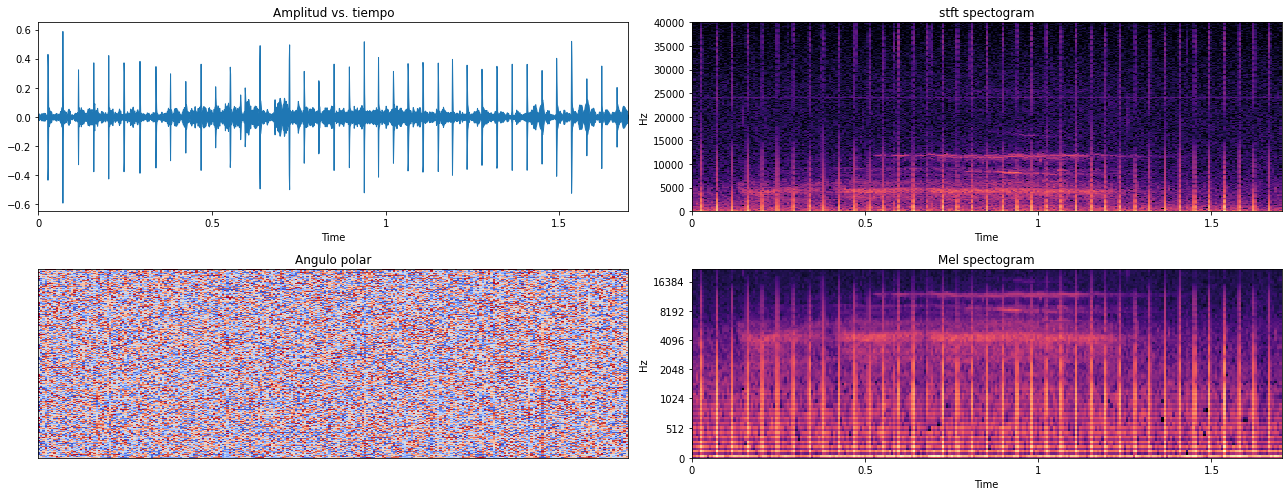

In [ ]:
from numpy.random import randint

################ plot Amplitud vs. tiempo ##########
#original
n = randint(0, len(listdir))
audio_random = pathdir+listdir[n]
get_sr = librosa.get_samplerate(audio_random)
y, sr = librosa.load(audio_random, sr= get_sr)

fig, ax = plt.subplots(2, 2, figsize=(18, 7))
print(listdir[n])
librosa.display.waveplot(y, sr= sr, ax= ax[0, 0])
ax[0, 0].set_title('Amplitud vs. tiempo')

############# plot espectograma ############
#angulos de complejos
hop_length = 512
n_fft = 1024 # frame length 

#Short-Time-Fourier-Transform
stft = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)

#Separar resultado en parte de magnitud y fase
stft_magnitude, stft_phase = librosa.magphase(stft)
print("Forma de la imagen:",stft_magnitude.shape,'\n')

# Pasar amplitud a decibeles para espectrograma
stft_magnitude_db = librosa.amplitude_to_db(stft_magnitude, ref=np.max)

#plt.figure(figsize=(12, 6))

#Mostrar Espectrograma
librosa.display.specshow(stft_magnitude_db, x_axis='time', y_axis='linear', 
                         sr=sr, hop_length=hop_length, ax= ax[0, 1])

ax[0, 1].set_title('stft spectogram')
#title = 'n_fft={},  hop_length={},  time_steps={},  fft_bins={}  (2D resulting shape: {})'
#ax[1].set_title(title.format(n_fft, hop_length, 
#                       stft_magnitude_db.shape[1], 
#                       stft_magnitude_db.shape[0], 
#                       stft_magnitude_db.shape));

############### plot angulo imaginario #####################
short_fourier_I = np.imag(librosa.stft(y))
short_fourier_R = np.real(librosa.stft(y))
short_fourier_ang = np.angle(librosa.stft(y))

print(short_fourier_R.shape)
print(short_fourier_R[0,5])
print(short_fourier_ang[:,2])
librosa.display.specshow(short_fourier_ang, ax= ax[1, 0]);
ax[1, 0].set_title('Angulo polar')

############### mel spectogram ############
# number of mel frequency bands 
n_mels = 100

#fig, ax = plt.subplots(1, 2, figsize=(22, 5))

fmin = 0            
fmax = 22050 # sample_rate/2

mel_spec = librosa.feature.melspectrogram(y, n_fft=n_fft, hop_length=hop_length,
                                          n_mels=n_mels, sr= sr, power=1.0,
                                          fmin=fmin, fmax=fmax)

mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.max)

img=librosa.display.specshow(mel_spec_db, x_axis='time',  y_axis='mel', 
                         sr=sr, hop_length=hop_length, 
                         fmin=fmin, fmax=fmax, ax=ax[1, 1])
ax[1, 1].set_title('Mel spectogram')
plt.tight_layout();
ipd.Audio(pathdir+listdir[n])

(1025, 152)
-0.006597031
[ 0.        -2.0856657  1.3635767 ... -1.9023479  1.1645385  3.1415927]


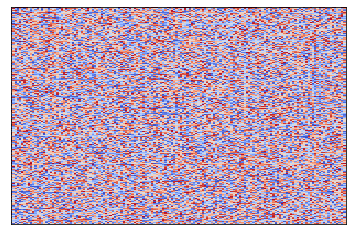

In [ ]:
# number of mel frequency bands 
n_mels = 100

fig, ax = plt.subplots(1, 2, figsize=(22, 5))

fmin = 0            
fmax = 22050 # sample_rate/2

mel_spec = librosa.feature.melspectrogram(pathdir+listdir[n], n_fft=n_fft, hop_length=hop_length,
                                          n_mels=n_mels, sr=librosa_sample_rate, power=1.0,
                                          fmin=fmin, fmax=fmax)

(128, 186)


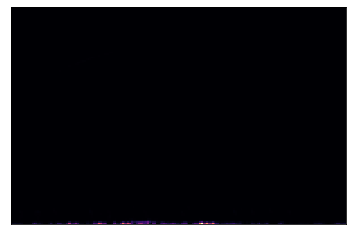

In [ ]:
mel_spect = librosa.feature.melspectrogram(y= y, sr= sr)
print(mel_spect.shape)
librosa.display.specshow(mel_spect);

Pantropical Spotted Dolphin54.mp4


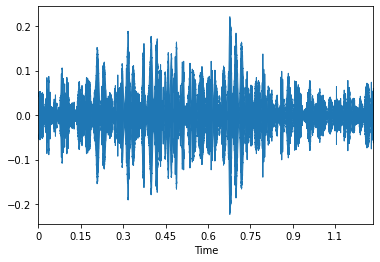

In [ ]:
###### PARAMETRO #######
len_y = 22295 #es la menor longitud de filas que se va a definir como longitud constante para los tensores
########################
#resampleada
duration = librosa.get_duration(y)
new_sr = int(len_y/duration)
new_y = librosa.resample(y, sr, new_sr)
print(listdir[n])
librosa.display.waveplot(new_y, sr= new_sr)
ipd.Audio(new_y,rate=new_sr)


(128, 13)


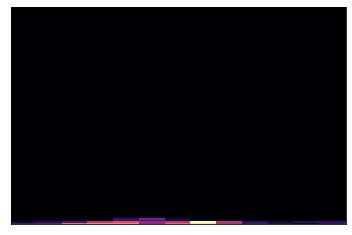

In [ ]:
mel_spect_re = librosa.feature.melspectrogram(y= new_y, sr= new_sr)
print(mel_spect_re.shape)
librosa.display.specshow(mel_spect_re);

In [ ]:
for i, audio in enumerate(listdir):
  print(i)
  print(librosa.get_samplerate(pathdir+audio))

0
14900
1
14900
2
14900
3
10240
4
14900
5
14900
6
14900
7
14900
8
14900
9
14900
10
14900
11
14900
12
14900
13
14900
14
14900
15
14900
16
14900
17
14900
18
14900
19
14900
20
14900
21
40960
22
40960
23
40960
24
40960
25
40960
26
40960
27
40960
28
40960
29
20480
30
20480
31
21900
32
21900
33
21900
34
21900
35
21900
36
21900
37
21900
38
21900
39
21900
40
21900
41
21900
42
21900
43
21900
44
21900
45
21900
46
21900
47
21900
48
21900
49
21900
50
21900
51
21900
52
21900
53
21900
54
21900
55
21900
56
5000
57
5000
58
5000
59
5000
60
5000
61
5000
62
5000
63
5000
64
5000
65
5000
66
30000
67
30000
68
30000
69
30000
70
30000
71
60600
72
60600
73
60600
74
60600
75
60600
76
60600
77
60600
78
81600
79
81600
80
81600
81
81600
82
81600
83
81600
84
81600
85
81600
86
81600
87
81600
88
81600
89
80000
90
80000
91
80000
92
80000
93
80000
94
80000
95
80000
96
80000
97
80000
98
80000
99
80000
100
80000
101
80000
102
80000
103
81920
104
81920
105
81920
106
81920
107
81920
108
81920
109
81920
110
81920
111
81920


## Creación del Tensor de Audios
---
Con este loop se busca crear matrices para cada uno de los audios con el mismo tamaño para poder apilarlos para formar un tensor de dimensiones: (1697, 109620, 2). dos columnas que representan los puntos de amplitudes y el tiempos de 109620 filas de sampleos para 1602 audios.

**08/05/2021**
un tensor de dimensiones: (1690, 22295, 2). dos columnas que representan los puntos de amplitudes y el tiempos de 22295 filas de sampleos para 1690 audios

In [ ]:
with tf.device('/device:GPU:0'):
  cetaceo = listdir_6min[0]
  y_1, sr_1 = librosa.load(pathdir+cetaceo)
  duration = len(y_1)/sr_1
  sr = len_y/duration 
  y_1 = librosa.resample(y_1, sr_1, sr)

  df_1 = pd.DataFrame(y_1, columns=['Amplitude'])
  df_1['segundos'] = list(map(lambda x : x/sr_1,range(len(df_1.index))))
  T = df_1.values[np.newaxis, :, :]

  #y_1, sr_1 = librosa.load(pathdir+listdir_6min[0])
  #duration = len(y_1)/float(sr_1)
  #df_1 = pd.DataFrame(y_1, columns=['Amplitude'])
  #df_1['segundos'] = list(map(lambda x : x/sr_1,range(len(df_1.index))))
  #T = df_1.values[np.newaxis, :, :]

  for i in range(len(listdir_6min)-1):
      # Cargamos el audio
      n = i+1
      #print(f'\n========================= \nIteración {i+1}: {listdir_6min[n]} \n')
      y_2, sr_2 = librosa.load(pathdir+listdir_6min[n])
      duration = len(y_2)/sr_2
      
      #print(f'Duración: {duration}')
      sr_new = len_y/duration
      #print(f'Tipo de sr: {type(sr_new)}, Tipo de Duration: {type(duration)}')
      #print(f'tasa de muestreo (sr) de: {sr_new}')
      y_2 = librosa.resample(y_2, sr_2, sr_new)
      #print(f'Cantidad de pts muestreados: {len(y_2)}')
      #vuelve el sampling a data frame
      df_2 = pd.DataFrame(y_2, columns=['Amplitude'])
      #agregamos el tiempo
      df_2['segundos'] = list(map(lambda x : x/sr_new,range(len(df_2.index))))
      B = df_2.values[np.newaxis, :, :]
      #print(f'shape de la matriz: {B.shape}')
      if B.shape == (1, len_y+1, 2):
          T = np.concatenate((T, B[:, 0:len_y, :]), axis=0)
          #print(f'Dimensiones Tensor: {T.shape}')
      else:
          T = np.concatenate((T, B), axis=0)
          #print(f'Dimensiones Tensor: {T.shape}')
      #   pas
      if i%100 == 0:
          print(f'iteración: {i+1}')
          print(f'Dimensiones: {T.shape}')

In [ ]:
print(f'Tensor de audios: {T}\n')
print(f'Forma del Tensor de audios: {T.shape}')

#exportamos el tensor en formato .npz (arreglo comprimido)
path = '/content/drive/MyDrive/Colab Notebooks/IA y AP/Proyecto/'
np.savez_compressed(path + 'Tensor_ceatceos', T)

In [ ]:
#cargamos el tensor de audios
path = '/content/drive/MyDrive/Colab Notebooks/IA y AP/Proyecto/' #Trabajando desde Drive
#path = '/home/mofoko/Desktop/Diplomato intel artificial/IA y AP/Proyecto/' #Trabajando desde local
npz = np.load(path + 'Tensor_ceatceos.npz')

In [ ]:
print(type(npz))
#npz guarda el tensor en un diccionario
print(npz.files) #.files nos da las keys del diccionario
T = np.array(npz['arr_0'])
print(T)
print(T.shape)

In [ ]:
print(f'Primero audio: {T[0, :, :].shape}')

Primero audio: (109620, 2)


## Etiquetas (OneHot)
---


In [ ]:
name = 'Humpback Whale44.mp4'

In [ ]:
#split_name = re.split(r'\d', name, maxsplit=2)
split_name = re.split(r'(\d*\.)', name, maxsplit=2)
split_name[1] = int(re.sub(r'[\.]', '', split_name[1]))
#namenum_mp4 = re.split(r'\.', name, maxsplit=2)
#name_num = re.split(r'\D*', namenum_mp4[0], maxsplit=2)
#split_name[0]

#print(namenum_mp4, name_num)
#namenum_mp4[0]
print(split_name)

['Humpback Whale', 44, 'mp4']


In [ ]:
np.array(listdir_6min).shape

(1690,)

In [ ]:
#con un Dataframe
#df_full['Cetáceo']
#con un np.array
audios = np.array(listdir_6min)


In [ ]:
#funcion para generar las etiquetas
def etiquetas_audios(audios):
    
  """
  Esta función tiene como input la lista
  de los nombres de los audios y retorna
  los nombres sin su numero y .mp4
  """
  names = []
  for audio in audios:
    split_name = re.split(r'\d', audio, maxsplit=2)
    names.append(split_name[0])
  return names

names = etiquetas_audios(audios)

In [ ]:
print(np.array(names)[:3]) #primeros 3
print(np.array(names).shape)

['Humpback Whale' 'Humpback Whale' 'Humpback Whale']
(1690,)


In [ ]:
labels = np.unique(names) #etiquetas
print(f'Etiquetas: \n{labels} \n\ncantidad: {len(labels)}')

Etiquetas: 
['Atlantic Spotted Dolphin' 'Bearded Seal' 'Beluga, White Whale'
 'Bottlenose Dolphin' 'Bowhead Whale' 'Clymene Dolphin' 'Common Dolphin'
 'False Killer Whale' 'Fin, Finback Whale' "Fraser's Dolphin"
 "Grampus, Risso's Dolphin" 'Harp Seal' 'Humpback Whale' 'Killer Whale'
 'Leopard Seal' 'Long-Finned Pilot Whale' 'Melon Headed Whale'
 'Minke Whale' 'Narwhal' 'Northern Right Whale'
 'Pantropical Spotted Dolphin' 'Ross Seal' 'Rough-Toothed Dolphin'
 'Short-Finned (Pacific) Pilot Whale' 'Southern Right Whale' 'Sperm Whale'
 'Spinner Dolphin' 'Striped Dolphin' 'Walrus' 'Weddell Seal'
 'White-beaked Dolphin' 'White-sided Dolphin'] 

cantidad: 32


In [ ]:
from sklearn.preprocessing import OneHotEncoder
def Onehot(names):
  Onehot = OneHotEncoder(sparse=False)
  # Declaramos el Transformer "OneHotEncoder".
  onehot_names = Onehot.fit_transform(np.array(names).reshape((-1, 1))) # Usamos "fit_transform"
  return onehot_names

print(Onehot(names).shape)
#escogemos un cetaceo al azar
n = np.random.randint(0, Onehot(names).shape[0])
print(f'nombre: {names[n]} \nOnehot: {Onehot(names)[n, :]}')
print(type(Onehot(names)))

(1690, 32)
nombre: White-beaked Dolphin 
Onehot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0.]
<class 'numpy.ndarray'>


## Pipeline tf.data
---

In [ ]:
#convertimos los audios a una matriz shape(len_y,2)
def audio2matriz(cetaceo, filas):
  """
  Esta función tiene como input el audio y 
  la cantidad de filas deseadas para retornar
  una matriz de shape(filas, 2) donde las
  dos columansa son amplitud y timepo
  """
  y_1, sr_1 = librosa.load(pathdir+cetaceo)
  #print('sr_1', sr_1)
  duration = len(y_1)/sr_1
  sr = filas/duration 
  #print('duration', duration)
  y_1 = librosa.resample(y_1, sr_1, sr)
  #algunas veces los decimales no alcanzan y sale con una fila mas
  if len(y_1) == filas+1:
    y_1 = y_1[:filas]
  #convierte amplitudes a tiempos
  #print('sr', sr)
  amplitu2time = lambda y_1, sr : list(map(lambda x : x/sr,range(len(y_1))))
  time = amplitu2time(y_1, sr)
  #concatena amplitudes y tiempos
  Ampli0time = lambda A, t: np.concatenate((np.array(A).reshape(-1, 1), np.array(t).reshape(-1, 1)), axis= 1)
  Matriz = Ampli0time(y_1, time)
  
  if np.isnan(Matriz).any() == True:
    print('hay un nan en', cetaceo)
  return Matriz

In [ ]:
from tensorflow.keras.utils import to_categorical
#definimos un generador
def tupla():
  """
  Esta función declara un generador que tiene como input n
  el numero de audios de la lista listdir_6min a generar 
  retornando una tupla de dos: nombre y la matriz del audio 
  """
  n=0
  list_names = Onehot(etiquetas_audios(listdir_6min))
  #list_names = tf.one_hot(range(len(listdir_6min)), 32)
  #for name, path_name in zip(list_names, listdir_6min):
  for name, path_name in zip(list_names, listdir_6min):
    M = audio2matriz(path_name, len_y)
    #print(M.shape, name.shape)
    n += 1
    print(f'Generate: {n}')
    yield M, name
  


In general, the more samples processed during each batch, the faster a training job will complete.

Batch size mas usados: 32, 64, 265.

**¡El batch size debe ser especificado en el objeto tf.data.dataset!**
si no se define alli se optiene el siguiente error:

`ValueError: Input 0 of layer dense_3 is incompatible with the layer: expected axis -1 of input shape to have value 44590 but received input with shape (22295, 2)`

In [ ]:
######## HIPERPARAMETROS ##########
batch_size = 5
###################################

print(f'número de batches: {len(listdir_6min)/batch_size}')
print(f'TEST batches 30%: {round((len(listdir_6min)/batch_size)*0.3)}')
print(f'TRAIN batches 70%: {round((len(listdir_6min)/batch_size)*0.7)}')

número de batches: 338.0
TEST batches 30%: 101
TRAIN batches 70%: 237


In [ ]:
print(len(listdir_6min))
print(int(len(listdir_6min)*0.3))
print(int(len(listdir_6min)*0.7))

1690
507
1183


if your dataset contains 10,000 elements but buffer_size is set to 1,000, then shuffle will initially select a random element from only the first 1,000 elements in the buffer.

In [ ]:
with tf.device('/device:GPU:0'):
  
  ds_counter = tf.data.Dataset.from_generator(tupla, output_signature=(tf.TensorSpec(shape=(len_y, 2), 
                                                                       dtype=tf.float64), 
                                                                       tf.TensorSpec(shape=(32,), 
                                                                       dtype=tf.int32))).cache().shuffle(len(listdir), reshuffle_each_iteration=True).batch(batch_size).repeat() #shuffle si afecta la generación
                                                                                                                                  #reshuffle: cada ves que lo ejecutemos barajará diferente
  #args=[3] es el argumento n del generador tupla(3)
  print(ds_counter.element_spec[0].shape) #shape de las etiquetas
  print(ds_counter.element_spec[1].shape) #shape de los datos

  test_dataset = ds_counter.take(101)
  train_dataset = ds_counter.skip(101)
  print(test_dataset.element_spec) #shape de las etiquetas
  print(train_dataset.element_spec)

(None, 22295, 2)
(None, 32)
(TensorSpec(shape=(None, 22295, 2), dtype=tf.float64, name=None), TensorSpec(shape=(None, 32), dtype=tf.int32, name=None))
(TensorSpec(shape=(None, 22295, 2), dtype=tf.float64, name=None), TensorSpec(shape=(None, 32), dtype=tf.int32, name=None))


In [ ]:
#genera el 30% de los datos y toma un n batch es decir genera skip(n) los datos n datos a saltar 507 datos + n de shuffle(n)  y bota un tensor de (batch(n), 22295, 2)
#it = iter(train_dataset.take(1)) #toma un batch si batch es 32 entonces dará (32, filas, cols)
#next(it)
#de esta menera en el entrenamiento primero va a generar 507 datos que se va a saltar y depúes va ir generando 32 para cada batch

#genera shuffle(n) datos y bota un tensor (batch(n), 22295, 2)
it = iter(test_dataset.take(1)) #toma un batch
next(it)

#este genera shuffle(n) elementos para barajar esos n datos y bota un tensor de take(n)(n, 22295, 2) tamaño
#it = iter(ds_counter.take(2))
#next(it) #muestra solo el primero de los take(n)(n, 22295, 29)




Generate: 1
Generate: 2
Generate: 3
Generate: 4
Generate: 5
Generate: 6
Generate: 7
Generate: 8
Generate: 9
Generate: 10
Generate: 11
Generate: 12
Generate: 13
Generate: 14
Generate: 15
Generate: 16
Generate: 17
Generate: 18
Generate: 19
Generate: 20
Generate: 21
Generate: 22
Generate: 23
Generate: 24
Generate: 25
Generate: 26
Generate: 27
Generate: 28
Generate: 29
Generate: 30
Generate: 31
Generate: 32
Generate: 33
Generate: 34
Generate: 35
Generate: 36
Generate: 37
Generate: 38
Generate: 39
Generate: 40
Generate: 41
Generate: 42
Generate: 43
Generate: 44
Generate: 45
Generate: 46
Generate: 47
Generate: 48
Generate: 49
Generate: 50
Generate: 51
Generate: 52
Generate: 53
Generate: 54
Generate: 55
Generate: 56
Generate: 57
Generate: 58
Generate: 59
Generate: 60
Generate: 61
Generate: 62
Generate: 63
Generate: 64
Generate: 65
Generate: 66
Generate: 67
Generate: 68
Generate: 69
Generate: 70
Generate: 71
Generate: 72
Generate: 73
Generate: 74
Generate: 75
Generate: 76
Generate: 77
Generate

(<tf.Tensor: shape=(5, 22295, 2), dtype=float64, numpy=
 array([[[-4.46738489e-03,  0.00000000e+00],
         [-2.07189121e-03,  4.48225938e-04],
         [-2.14714231e-03,  8.96451875e-04],
         ...,
         [-2.34930706e-03,  9.99185260e+00],
         [-2.05291226e-03,  9.99230083e+00],
         [-2.92840251e-03,  9.99274905e+00]],
 
        [[-1.33341774e-02,  0.00000000e+00],
         [-1.96377630e-03,  6.36019078e-05],
         [-1.98356155e-02,  1.27203816e-04],
         ...,
         [-1.92947239e-02,  1.41781373e+00],
         [-1.31503632e-02,  1.41787733e+00],
         [-9.82217118e-03,  1.41794093e+00]],
 
        [[ 4.42563416e-03,  0.00000000e+00],
         [ 7.41301384e-03,  1.02728869e-04],
         [ 9.20718163e-03,  2.05457738e-04],
         ...,
         [-8.29952396e-03,  2.29003195e+00],
         [-9.72843077e-03,  2.29013468e+00],
         [-7.26838410e-03,  2.29023741e+00]],
 
        [[-1.08381342e-02,  0.00000000e+00],
         [-1.81886200e-02,  1.04083616

## Arquitectura
---

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers 
from tensorflow.keras import regularizers

model = Sequential()

## add(): Adiciona capas una por una
# layers.Dense(): Coloca una capa densa
model.add(layers.Input(shape=(22295, 2)))
model.add(layers.Flatten(name= 'flat_1'))
model.add(layers.Dense(units=256, activation='relu',name='dense_1')) #capa de entrada 16 neuronas

model.add(layers.Dense(units=128, activation='relu',name='dense_2')) #capa de entrada 16 neuronas

#layers.dropout(): esto previene el overfitting (Regularización)
#model.add(layers.Dropout(0.5)) # 10% de las neuronas son descativadas en cada epoca
model.add(layers.Dense(units=64, activation='relu', name='dense_3')) #capa oculta 16 neuronas

#model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=32, activation='softmax', name='dense_4')) #capa de salida 32 neurona porque son 32 clases!
#si las de salida tienen mismatch con las categorias habra un ValueError(“Shapes %s and %s are incompatible” % (self, other))

The difference between ``sparse_categorical_crossentropy`` and ``categorical_crossentropy`` is whether your targets are one-hot encoded.

one-hot encoded. So you should use categorical_crossentropy loss function.

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flat_1 (Flatten)             (None, 44590)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               11415296  
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
Total params: 11,458,528
Trainable params: 11,458,528
Non-trainable params: 0
_________________________________________________________________


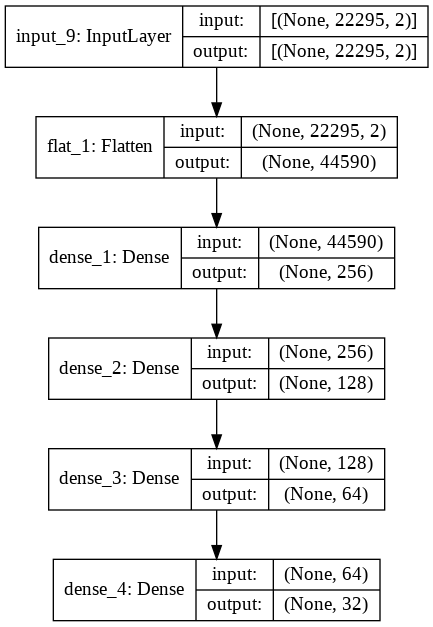

In [ ]:
from tensorflow.keras import utils

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()
utils.plot_model(model, show_shapes=True)

numero de fila dividido el tamaño de batch.

`steps_per_epoch=n filas test//batch_size`

`validation_steps= n filas val//batch_size`

batch_size = Number of samples per gradient update
steps_per_epoch = Total number of steps (batches of samples) before declaring one epoch finished

The parameters "steps_per_epoch" and "validation_steps" have to be equal to the length of the dataset divided by the batch size.

generator can generate at least `steps_per_epoch * epochs = batches`

Entonecs `steps_per_epoch` = el numero de batch a pasar en el fit por cada epoc


1183 train /5 batch size = 236 batches en el entrenamiento

236/10 epochs = steps_per_epoch


In [ ]:
#¿por qué demora para empezar y terminar cada epoch?
#cuando teriman cada epoca el reinicia el generador
#antes de entrenar tiene que generar los de entreno
#al final del epoch debe generar los datos de validación
with tf.device('/device:GPU:0'):
  history = model.fit(train_dataset, 
                      epochs=50, 
                      validation_data= test_dataset, 
                      steps_per_epoch=int(((len(listdir_6min)*0.7)/batch_size)/10), 
                      validation_steps=int(((len(listdir_6min)*0.3)/batch_size)/10))
  
  #validation_steps= y steps_per_epoch= es fundamental para que no salga n/unknow en los pasos

Epoch 1/50
23/23 [==============================] - 2s 56ms/step - loss: 87.1754 - accuracy: 0.0125 - val_loss: 36.0014 - val_accuracy: 0.0400
Epoch 2/50
23/23 [==============================] - 1s 53ms/step - loss: 26.2975 - accuracy: 0.0358 - val_loss: 27.1718 - val_accuracy: 0.0400
Epoch 3/50
23/23 [==============================] - 1s 52ms/step - loss: 38.4276 - accuracy: 0.0704 - val_loss: 39.5021 - val_accuracy: 0.1200
Epoch 4/50
23/23 [==============================] - 1s 52ms/step - loss: 20.3130 - accuracy: 0.0090 - val_loss: 7.7074 - val_accuracy: 0.0400
Epoch 5/50
23/23 [==============================] - 1s 53ms/step - loss: 6.5194 - accuracy: 0.0671 - val_loss: 5.3171 - val_accuracy: 0.0000e+00
Epoch 6/50
23/23 [==============================] - 1s 53ms/step - loss: 5.7194 - accuracy: 0.0281 - val_loss: 3.4598 - val_accuracy: 0.0600
Epoch 7/50
23/23 [==============================] - 1s 53ms/step - loss: 3.7646 - accuracy: 0.0186 - val_loss: 4.6275 - val_accuracy: 0.0800
Ep

In [ ]:
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Entrenamiento y validación '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

def list_confusion_matrix(cm,classes):
  df = pd.DataFrame(data = cm,
                    index = pd.MultiIndex.from_product([['Valor real'], classes]),
                    columns = pd.MultiIndex.from_product([['Valor predicho'], classes]))
  
  return df

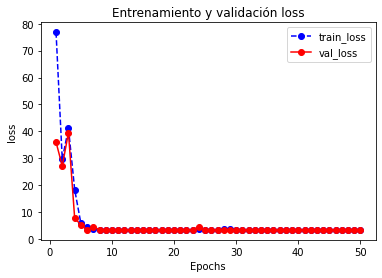

In [ ]:
plot_metric(history, 'loss')

## from_slice

In [ ]:
#cargamos el tensor de audios
path = '/content/drive/MyDrive/Colab Notebooks/IA y AP/Proyecto/' #Trabajando desde Drive
#path = '/home/mofoko/Desktop/Diplomato intel artificial/IA y AP/Proyecto/' #Trabajando desde local
npz = np.load(path + 'Tensor_ceatceos.npz')

In [ ]:
print(type(npz))
#npz guarda el tensor en un diccionario
print(npz.files) #.files nos da las keys del diccionario
X = np.array(npz['arr_0'])
print(X)
print(X.shape)

<class 'numpy.lib.npyio.NpzFile'>
['arr_0']
[[[ 3.25231068e-02  0.00000000e+00]
  [ 6.46279529e-02  4.53514739e-05]
  [ 5.14417700e-02  9.07029478e-05]
  ...
  [-4.06058738e-03  1.01097506e+00]
  [ 1.93451736e-02  1.01102041e+00]
  [ 2.22022813e-02  1.01106576e+00]]

 [[ 5.41028846e-03  0.00000000e+00]
  [ 3.51939499e-02  7.71485629e-04]
  [ 5.02207056e-02  1.54297126e-03]
  ...
  [-3.46293598e-02  1.71979577e+01]
  [-2.56604943e-02  1.71987291e+01]
  [-2.62694657e-02  1.71995006e+01]]

 [[ 2.46878322e-02  0.00000000e+00]
  [ 4.60131504e-02  6.92973369e-04]
  [ 1.57260895e-02  1.38594674e-03]
  ...
  [ 1.00245461e-01  1.54477623e+01]
  [ 1.00377731e-01  1.54484553e+01]
  [ 1.00165486e-01  1.54491483e+01]]

 ...

 [[-1.65525414e-02  0.00000000e+00]
  [-1.04835359e-02  5.83247009e-04]
  [ 1.71998367e-02  1.16649402e-03]
  ...
  [-4.98331664e-03  1.30017423e+01]
  [ 1.13465292e-02  1.30023256e+01]
  [ 2.29954496e-02  1.30029088e+01]]

 [[-9.72679555e-02  0.00000000e+00]
  [-1.65033355e-01

In [ ]:
y = Onehot(etiquetas_audios(listdir_6min))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=31, stratify=y)

print(f'Train: {X_train.shape}, {y_train.shape}')
print(f'test: {X_test.shape}, {y_test.shape}')

Train: (1183, 22295, 2), (1183, 32)
test: (507, 22295, 2), (507, 32)


In [ ]:
from tensorflow.data import Dataset

data_test = Dataset.zip((Dataset.from_tensor_slices(X_test),
                         Dataset.from_tensor_slices(y_test))).batch(32)
data_train = Dataset.zip((Dataset.from_tensor_slices(X_train),
                          Dataset.from_tensor_slices(y_train))).batch(32)
print(data_test.element_spec)
print(data_train.element_spec)

(TensorSpec(shape=(None, 22295, 2), dtype=tf.float64, name=None), TensorSpec(shape=(None, 32), dtype=tf.float64, name=None))
(TensorSpec(shape=(None, 22295, 2), dtype=tf.float64, name=None), TensorSpec(shape=(None, 32), dtype=tf.float64, name=None))


In [ ]:
it = iter(data_train)

print(next(it))
print(next(it))

(<tf.Tensor: shape=(265, 22295, 2), dtype=float64, numpy=
array([[[ 5.33397729e-03,  0.00000000e+00],
        [ 6.66256202e-03,  1.01164604e-04],
        [ 6.95851585e-03,  2.02329209e-04],
        ...,
        [-1.63061302e-02,  2.25516136e+00],
        [-2.05494221e-02,  2.25526252e+00],
        [-1.59859266e-02,  2.25536369e+00]],

       [[ 4.02492806e-02,  0.00000000e+00],
        [ 8.02750420e-03,  8.48018657e-05],
        [ 1.51364589e-02,  1.69603731e-04],
        ...,
        [ 2.22886428e-02,  1.89040319e+00],
        [ 1.75582357e-02,  1.89048799e+00],
        [-1.95655003e-02,  1.89057279e+00]],

       [[ 4.44446737e-03,  0.00000000e+00],
        [-2.15309244e-02,  4.01501409e-05],
        [-5.76918991e-03,  8.03002819e-05],
        ...,
        [ 1.04002766e-02,  8.95026942e-01],
        [ 3.11181378e-02,  8.95067092e-01],
        [-2.40540784e-03,  8.95107242e-01]],

       ...,

       [[-1.01589905e-02,  0.00000000e+00],
        [-1.60138402e-02,  6.36019078e-05],
    

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers 
from tensorflow.keras import regularizers

model = Sequential()

## add(): Adiciona capas una por una
# layers.Dense(): Coloca una capa densa
model.add(layers.Input(shape=(22295, 2)))
model.add(layers.Flatten(name= 'flat_1'))
model.add(layers.Dense(units=256, activation='relu',name='dense_1'))
model.add(layers.Dropout(.1))
model.add(layers.Dense(units=128, activation='relu',name='dense_2'))
model.add(layers.Dropout(.1))
model.add(layers.Dense(units=64, activation='relu',name='dense_3'))
model.add(layers.Dropout(.1))
model.add(layers.Dense(units=32, activation='softmax', name='dense_4')) #capa de salida 32 neurona porque son 32 clases!
#si las de salida tienen mismatch con las categorias habra un ValueError(“Shapes %s and %s are incompatible” % (self, other))

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flat_1 (Flatten)             (None, 44590)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               11415296  
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_14 (Dropout)         (None, 64)               

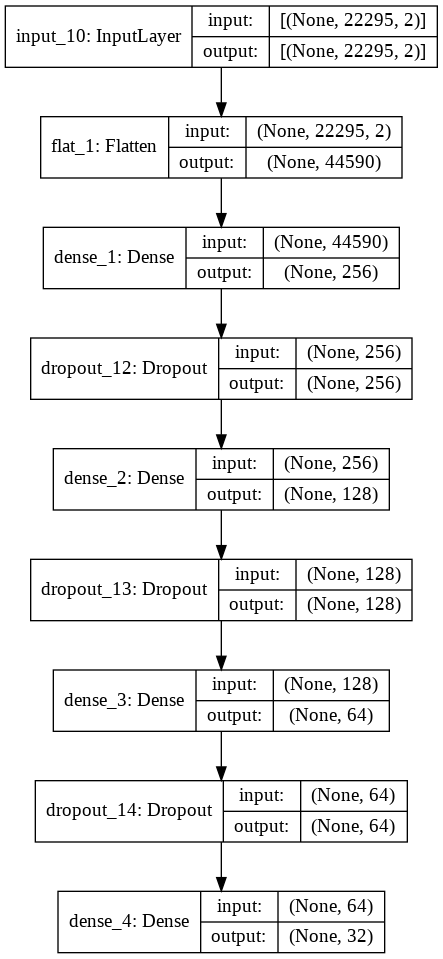

In [ ]:
from tensorflow.keras import utils

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()
utils.plot_model(model, show_shapes=True)

In [ ]:
with tf.device('/device:GPU:0'):
  history = model.fit(data_train, epochs=50, validation_data= data_test)
  #validation_steps= y steps_per_epoch= es fundamental para que no salga n/unknow en los pasos

Epoch 1/50
37/37 [==============================] - 4s 82ms/step - loss: 47.0059 - accuracy: 0.0381 - val_loss: 13.5366 - val_accuracy: 0.0296
Epoch 2/50
37/37 [==============================] - 3s 78ms/step - loss: 21.1976 - accuracy: 0.0257 - val_loss: 3.4609 - val_accuracy: 0.0394
Epoch 3/50
37/37 [==============================] - 3s 78ms/step - loss: 5.4413 - accuracy: 0.0373 - val_loss: 3.4567 - val_accuracy: 0.0394
Epoch 4/50
37/37 [==============================] - 3s 79ms/step - loss: 3.9894 - accuracy: 0.0455 - val_loss: 3.4524 - val_accuracy: 0.0473
Epoch 5/50
37/37 [==============================] - 3s 77ms/step - loss: 3.8152 - accuracy: 0.0453 - val_loss: 3.4482 - val_accuracy: 0.0671
Epoch 6/50
37/37 [==============================] - 3s 80ms/step - loss: 3.6441 - accuracy: 0.0677 - val_loss: 3.4442 - val_accuracy: 0.0671
Epoch 7/50
37/37 [==============================] - 3s 79ms/step - loss: 3.5473 - accuracy: 0.0614 - val_loss: 3.4403 - val_accuracy: 0.0671
Epoch 8/50

In [ ]:
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Entrenamiento y validación '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

def list_confusion_matrix(cm,classes):
  df = pd.DataFrame(data = cm,
                    index = pd.MultiIndex.from_product([['Valor real'], classes]),
                    columns = pd.MultiIndex.from_product([['Valor predicho'], classes]))
  
  return df

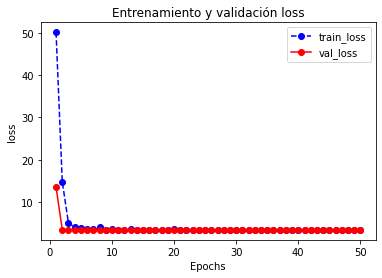

In [ ]:
plot_metric(history, 'loss')

## convolutional
---

Este error se debe a que las etiqetas estan en onehot encoding
por lo que con `np.argmax()` se convirtieron a etiquetas de enteros.

`ValueError: Can not squeeze dim[1], expected a dimension of 1, got 32 for `

In [ ]:
from sklearn.model_selection import train_test_split

y = Onehot(etiquetas_audios(listdir_6min))

#X = X.reshape((1690, 22295, 2))
X = X[:, :, 0]
y = np.argmax(y, axis=1) #onehot to int

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=31, stratify=y)
#X_train, X_test, y_train, y_test = X_train.reshape((1183, 22295, 2, 1)), X_test.reshape((507, 22295, 2, 1)), y_train.reshape((1183, 1, 1)), y_test.reshape((507, 1, 1))

X_train, X_test, y_train, y_test = X_train.reshape((1183, 22295, 1)), X_test.reshape((507, 22295, 1)), y_train.reshape((1183, 1)), y_test.reshape((507, 1))

print(f'Train: {X_train.shape}, {y_train.shape}')
print(f'test: {X_test.shape}, {y_test.shape}')

Train: (1183, 22295, 1), (1183, 1)
test: (507, 22295, 1), (507, 1)


In [ ]:
X_train[1, :20, :]

array([[ 0.0070717 ],
       [-0.0105233 ],
       [-0.00186272],
       [-0.0026599 ],
       [-0.00969472],
       [ 0.01527189],
       [ 0.00345563],
       [-0.00726157],
       [ 0.00675396],
       [ 0.00112153],
       [-0.00094134],
       [ 0.00025779],
       [ 0.00304967],
       [-0.0095915 ],
       [-0.01365974],
       [-0.00311302],
       [ 0.0002057 ],
       [ 0.00597172],
       [-0.01096267],
       [ 0.00571181]])

In [ ]:
#escanea si hay un nan
print(X.shape)
for i in range(X.shape[0]):
  for j in range(X.shape[1]):
    print(i, j, sep=' ', end=',')
    if np.isnan(X[i, j]) == True:
      print('is nan:', X[i, j],'in', i , j)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from tensorflow.data import Dataset

data_test = Dataset.zip((Dataset.from_tensor_slices(X_test),
                         Dataset.from_tensor_slices(y_test))).batch(128)#.batch(64)
data_train = Dataset.zip((Dataset.from_tensor_slices(X_train),
                          Dataset.from_tensor_slices(y_train))).batch(128)#.batch(64)
print(data_test.element_spec)
print(data_train.element_spec)

(TensorSpec(shape=(None, 22295, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None, 1), dtype=tf.int64, name=None))
(TensorSpec(shape=(None, 22295, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None, 1), dtype=tf.int64, name=None))


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras import layers, Input
from tensorflow.keras import utils

#inputs = Input(shape =(len_y, 2, 1)) 
inputs = Input(shape =(len_y, 1))
print(f'output inputs: {inputs.shape}')
#encoder
#input = 28 x 28 x 1 (wide and thin)
conv1 = layers.Conv1D(4, (3), activation='relu', strides=(2),padding='same')(inputs) 
print(f'output conv1: {conv1.shape}') #(None, 24, 24, 1)
conv2 = layers.Conv1D(16, (3), activation='relu', strides=(2),padding='same')(conv1)
print(f'output conv2: {conv2.shape}') #(None, 12, 12, 4)
conv3 = layers.Conv1D(32, (3), activation='relu', strides=(2),padding='same')(conv2)
print(f'output conv3: {conv3.shape}') #(None, 3, 3, 32)
#conv4 = layers.Conv2D(64, (3, 3), activation='relu', strides=(2,2),padding='same')(conv3) #2 x 2 x 64

# Save the shape to the decoder
shape = conv3.shape#.as_list()
print(f'output conv3: {shape}') #(None, 2, 2, 64)
flat = layers.Flatten()(conv3)
print(f'output flat: {flat.shape}') #(None, 256
densa = layers.Dense(64, activation='relu',name ='densa')(flat)
print(f'output densa: {densa.shape}')
#densa2 = layers.Dense(32, activation='relu',name ='densa2')(densa) 
#print(f'output dense: {densa2.shape}')
encoded = layers.Dense(32, activation='softmax',name ='latent_vector')(densa) 
print(f'output dense: {encoded.shape}')
encoder = Model(inputs, encoded, name ='encoder')


output inputs: (None, 22295, 1)
output conv1: (None, 11148, 4)
output conv2: (None, 5574, 16)
output conv3: (None, 2787, 32)
output conv3: (None, 2787, 32)
output flat: (None, 89184)
output densa: (None, 64)
output dense: (None, 32)


Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 22295, 1)]        0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 11148, 4)          16        
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 5574, 16)          208       
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 2787, 32)          1568      
_________________________________________________________________
flatten_1 (Flatten)          (None, 89184)             0         
_________________________________________________________________
densa (Dense)                (None, 64)                5707840   
_________________________________________________________________
latent_vector (Dense)        (None, 32)                2080

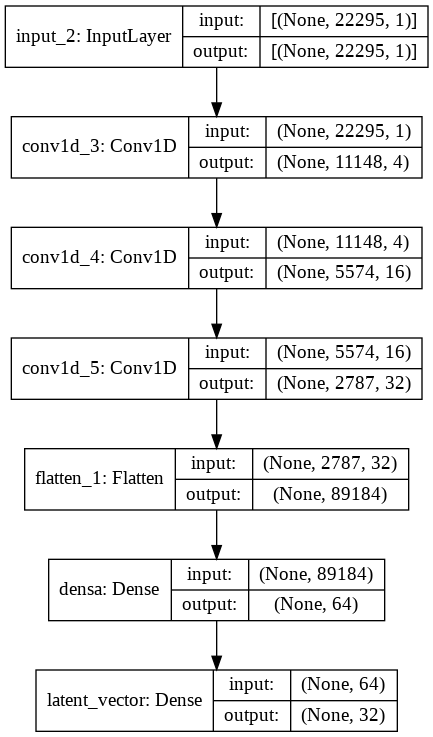

In [ ]:
from tensorflow.keras import utils

#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'mse'])
encoder.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics=['accuracy', 'mse'])

encoder.summary()
utils.plot_model(encoder, show_shapes=True)

In [ ]:
with tf.device('/device:GPU:0'):
  history = encoder.fit(data_train, epochs=50, validation_data= data_test)
  #validation_steps= y steps_per_epoch= es fundamental para que no salga n/unknow en los pasos

Epoch 1/50
10/10 [==============================] - 7s 700ms/step - loss: 3.4472 - accuracy: 0.0303 - mse: 332.7694 - val_loss: 3.3795 - val_accuracy: 0.0809 - val_mse: 328.7286
Epoch 2/50
10/10 [==============================] - 7s 686ms/step - loss: 3.2620 - accuracy: 0.1551 - mse: 332.7696 - val_loss: 3.2789 - val_accuracy: 0.1045 - val_mse: 328.7290
Epoch 3/50
10/10 [==============================] - 7s 680ms/step - loss: 3.0039 - accuracy: 0.2120 - mse: 332.7703 - val_loss: 3.1997 - val_accuracy: 0.1223 - val_mse: 328.7294
Epoch 4/50
10/10 [==============================] - 7s 681ms/step - loss: 2.6640 - accuracy: 0.3452 - mse: 332.7713 - val_loss: 3.1487 - val_accuracy: 0.1696 - val_mse: 328.7302
Epoch 5/50
10/10 [==============================] - 7s 683ms/step - loss: 2.2755 - accuracy: 0.4471 - mse: 332.7733 - val_loss: 3.2146 - val_accuracy: 0.1460 - val_mse: 328.7311
Epoch 6/50
10/10 [==============================] - 7s 688ms/step - loss: 1.8875 - accuracy: 0.5642 - mse: 332

In [ ]:
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Entrenamiento y validación '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

def list_confusion_matrix(cm,classes):
  df = pd.DataFrame(data = cm,
                    index = pd.MultiIndex.from_product([['Valor real'], classes]),
                    columns = pd.MultiIndex.from_product([['Valor predicho'], classes]))
  
  return df

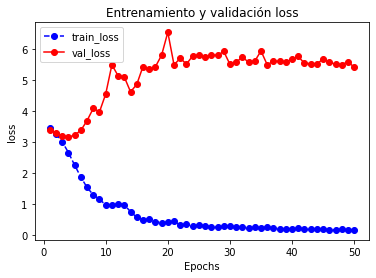

In [ ]:
plot_metric(history, 'loss')

# Audio to Images

## angulo

In [ ]:
import cv2 as cv

(1025, 36)
(56, 56)


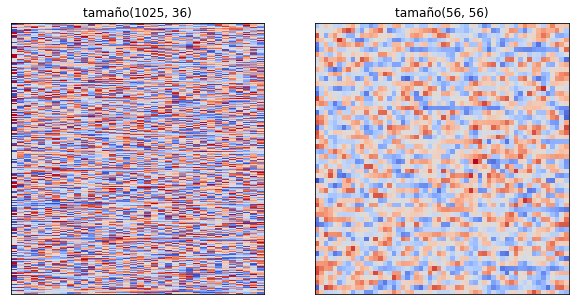

In [ ]:
from numpy.random import randint
n = randint(0, len(listdir))
audio_random = pathdir+listdir[n]
get_sr = librosa.get_samplerate(audio_random)
y, sr = librosa.load(audio_random, sr= get_sr)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

short_fourier_ang = np.angle(librosa.stft(y))
img1 = librosa.display.specshow(short_fourier_ang, ax=ax[0]);
ax[0].set_title(f'tamaño{short_fourier_ang.shape}')
print(short_fourier_ang.shape)


img_resize = cv.resize(short_fourier_ang,(56, 56), interpolation = cv.INTER_CUBIC)
ax[1].set_title(f'tamaño{img_resize.shape}')
print(img_resize.shape)
img2 = librosa.display.specshow(img_resize, ax=ax[1]);

0.009216662
6.0735356e-10


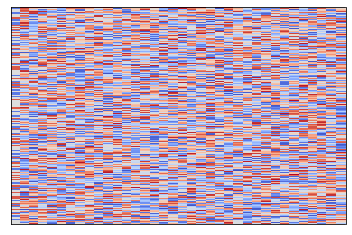

In [ ]:
from sklearn.preprocessing import StandardScaler

print(short_fourier_ang.mean())
sc = StandardScaler().fit_transform(short_fourier_ang)
print(sc.mean())   
#short_fourier_ang.flatten().max()#.shape#.max()
librosa.display.specshow(sc)

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

#########################
img_size = (56, 56) #tamaño de las imagenes
#########################

def generator():
  #audio_path = pathdir+listdir[n]
  cetaceo = []
  for i in range(0, len(listdir)):

    split_name = re.split(r'(\d*\.)', listdir[i], maxsplit=2)
    split_name[1] = int(re.sub(r'[\.]', '', split_name[1]))
    cetaceo.append(split_name[0])

  etiquetas = preprocessing.LabelEncoder().fit_transform(cetaceo)

  for i in range(0, len(listdir)):

    get_sr = librosa.get_samplerate(pathdir+listdir[i])
    y, sr = librosa.load(pathdir+listdir[i], sr= get_sr)
    short_fourier_ang = np.angle(librosa.stft(y)) 
    sc = StandardScaler().fit_transform(short_fourier_ang)
    img_resize = cv.resize(sc, img_size,
                           interpolation = cv.INTER_CUBIC)
    #print(img_resize.shape, etiquetas[i].shape)
    print("@", end='')
    yield img_resize, etiquetas[i]

In [ ]:
it = iter(generator())
next(it)

@

(array([[-1.0101391e+00,  6.4440101e-02,  4.9869967e-01, ...,
         -1.0488522e-01, -2.6262963e-01,  5.6913263e-01],
        [-4.2179995e-04, -7.4006304e-02,  8.7990397e-01, ...,
         -1.2440372e+00, -5.6817293e-01,  7.1841276e-01],
        [-5.6765920e-01, -5.3896725e-01,  8.0643702e-01, ...,
         -1.1879420e+00, -8.1893153e-02,  2.2317667e-01],
        ...,
        [-1.7973651e-01, -4.1058135e-01,  1.1927328e+00, ...,
         -9.5973903e-01, -1.6103501e+00, -6.9970524e-01],
        [ 5.4795003e-01,  4.3451595e-01, -6.3095427e-01, ...,
         -2.0413998e-01, -7.1172851e-01, -8.2225937e-01],
        [ 3.3266810e-01, -9.2659861e-01,  3.3645159e-01, ...,
          5.9267068e-01,  4.4996810e-01, -4.0820801e-01]], dtype=float32), 12)

<font color='red'>¡Filtrado de datos de evaluación durante el entrenamiento!!</font>

Al definir el dataset y colcarle .repeat() estoy haciendo infinitos batches

pero cuidado con la definición de train y el test, dado que como con test uso un take() tomando los primeros n y con el train uso un skip() saltando los de test y tomando el restante, este restante sera infinito dado que el dataset se repíte por lo que en algún punto estaré entrenando con los datos de test, dañando todo el .fit()

In [ ]:
######################
batch_size = 64
######################
print(f'número de batch: {round(len(listdir)/batch_size)} de tamaño {batch_size}')
dataset = tf.data.Dataset.from_generator(generator, output_signature=(tf.TensorSpec(shape= img_size[::-1], 
                                                                       dtype=tf.float64), 
                                                                       tf.TensorSpec(shape=(), 
                                                                       dtype=tf.int32))).cache().shuffle(len(listdir), reshuffle_each_iteration=True).batch(batch_size)#.repeat() #shuffle si afecta la generación
                                                                                                                                  #reshuffle: cada ves que lo ejecutemos barajará diferente
                                                                                                                                  #cache(): sirve para no tenenr que generar todo de nuevo cada ves que se reinicie el generador
print(dataset.element_spec)                                                                                                                                  


número de batch: 27 de tamaño 64
(TensorSpec(shape=(None, 56, 56), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))


In [ ]:
print(list(dataset.take(1).as_numpy_iterator())[0][0].shape) #shape de 1 solo batch sin etiquetas solo features
print(list(dataset.take(1).as_numpy_iterator())[0]) #una tupla (features, etiquetas) de un solo batch

(64, 56, 56)
(array([[[ 5.46732664e-01,  1.18089962e+00,  2.39071995e-01, ...,
          3.25844526e-01, -8.30702364e-01, -1.39212275e+00],
        [-1.21037006e+00,  3.54189605e-01, -9.17938165e-03, ...,
         -1.42366874e+00, -2.75398523e-01, -6.27278388e-01],
        [ 2.58819491e-01,  9.52779174e-01, -8.02012801e-01, ...,
         -2.36447647e-01,  3.42288941e-01,  2.13011026e-01],
        ...,
        [-3.84443521e-01, -2.16459826e-01,  5.59672713e-01, ...,
          2.08407313e-01, -9.07782912e-01,  1.65177330e-01],
        [ 5.94131529e-01,  1.27931440e+00, -6.79699898e-01, ...,
          5.40088415e-01, -1.56067538e+00,  7.71509469e-01],
        [ 1.08671784e+00,  4.68658626e-01, -9.74337757e-03, ...,
          1.54240096e+00, -7.70760655e-01, -6.89575315e-01]],

       [[-1.01323605e+00, -9.51806903e-01, -2.15941682e-01, ...,
          7.16670632e-01, -4.90925878e-01, -1.16227603e+00],
        [-1.53935393e-02, -4.93224740e-01, -6.58040881e-01, ...,
          9.79203701e-01

In [ ]:
num_batch = int(len(listdir)/batch_size)
print(len(listdir)/batch_size)
print(f'prueba 20%: take {round(num_batch*0.2)} batches')
print(f'val 20%: take {round(num_batch*0.2)} batches')
print(f'train 60%: take {round(num_batch*0.6)} batches')
num_batch_train = round(num_batch*0.6)
num_batch_val = round(num_batch*0.2)

train_dataset = dataset.take(num_batch_train)
test_dataset = dataset.skip(num_batch_train).take(num_batch_val)
evaluate_dataset = dataset.skip(num_batch_train + num_batch_val).take(num_batch_val)

#train_dataset = dataset.skip(num_batch_train)
print(test_dataset.element_spec) #shape de las etiquetas
print(train_dataset.element_spec)
print(evaluate_dataset.element_spec)

26.515625
prueba 20%: take 5 batches
val 20%: take 5 batches
train 60%: take 16 batches
(TensorSpec(shape=(None, 56, 56), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
(TensorSpec(shape=(None, 56, 56), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
(TensorSpec(shape=(None, 56, 56), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))


In [ ]:
print(f'train_dataset batches: {len(list(train_dataset.as_numpy_iterator()))}')
print(f'test_dataset batches: {len(list(test_dataset.as_numpy_iterator()))}') 
print(f'evaluate_dataset batches: {len(list(evaluate_dataset.as_numpy_iterator()))}')#numero de batches

train_dataset batches: 16
test_dataset batches: 5
evaluate_dataset batches: 5


In [ ]:
#ahora hacemos que cada uno se repita indefinidamente para entrenar varias epochs
train_dataset  = train_dataset.repeat()
test_dataset = test_dataset.repeat()
evaluate_dataset = evaluate_dataset.repeat()

En una celda se observan 85:
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

In [ ]:
#aquí ya no estamos generando pares de imagenes y etiquetas
#sino que que se esta generando batches!
it = iter(train_dataset.take(1))
next(it)

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1209
  n_fft, y.shape[-1]


@

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1209
  n_fft, y.shape[-1]


@

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1209
  n_fft, y.shape[-1]


@

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1815
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1815
  n_fft, y.shape[-1]


@@

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1815
  n_fft, y.shape[-1]


@

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1815
  n_fft, y.shape[-1]


@

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1242
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1809
  n_fft, y.shape[-1]


@@

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1758
  n_fft, y.shape[-1]


@

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1611
  n_fft, y.shape[-1]


@

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1209
  n_fft, y.shape[-1]


@

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=907
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=907
  n_fft, y.shape[-1]


@@

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1806
  n_fft, y.shape[-1]


@

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1710
  n_fft, y.shape[-1]


@

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1806
  n_fft, y.shape[-1]


@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

(<tf.Tensor: shape=(64, 56, 56), dtype=float64, numpy=
 array([[[ 0.89451271, -0.82773346,  1.17750871, ..., -1.19929361,
          -0.02666279,  0.87809783],
         [-0.09316371, -0.17124572,  0.70041609, ...,  0.36503798,
           0.66113788, -1.21678734],
         [ 1.07062614, -1.21368861,  0.04408065, ..., -0.12128544,
          -1.20211065,  0.97885478],
         ...,
         [ 0.11813325,  0.21429859,  0.58981746, ..., -0.66647959,
          -0.02486967,  0.68716735],
         [-1.4528532 , -0.98900801,  0.05530062, ..., -0.54808873,
          -1.21352589,  1.08854806],
         [ 0.06089915, -0.59650052,  0.23885229, ...,  0.09245703,
          -0.81029248,  0.688223  ]],
 
        [[ 0.26148492,  0.57132375,  0.41654444, ..., -0.68953109,
           0.88969016, -1.35664463],
         [-1.50051892,  0.91197777, -0.98012489, ..., -1.17203033,
          -1.59468567,  0.2461362 ],
         [ 0.12498973,  0.08948813,  1.18385124, ...,  0.15493594,
           0.45286158,  1.702

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras import layers, Input
from tensorflow.keras import utils


inputs = Input(shape =img_size[::-1])
x = layers.Reshape((img_size[0], img_size[1], 1), input_shape=(500, 500))(inputs)
print(f'output inputs: {inputs.shape}')
#encoder
#input = 28 x 28 x 1 (wide and thin)
conv1 = layers.Conv2D(4, (3, 3), activation='relu', strides=(2, 2),padding='same')(x) 
print(f'output conv1: {conv1.shape}') #(None, 24, 24, 1)
max1 = layers.MaxPool2D(2,2)(conv1)
conv2 = layers.Conv2D(16, (3, 3), activation='relu', strides=(2, 2),padding='same')(max1)
max2 = layers.MaxPool2D(2,2)(conv2)
print(f'output conv2: {conv2.shape}') #(None, 12, 12, 4)
conv3 = layers.Conv2D(32, (3, 3), activation='relu', strides=(2, 2),padding='same')(max2)
max3 = layers.MaxPool2D(2,2)(conv3)
print(f'output conv3: {conv3.shape}') #(None, 3, 3, 32)
conv4 = layers.Conv2D(64, (3, 3), activation='relu', strides=(2,2),padding='same')(max3) #2 x 2 x 64

# Save the shape to the decoder
shape = conv3.shape#.as_list()
print(f'output conv3: {shape}') #(None, 2, 2, 64)
flat = layers.Flatten()(max2)#(max3)
print(f'output flat: {flat.shape}') #(None, 256
densa = layers.Dense(64, activation='relu',name ='densa')(flat)
drop = layers.Dropout(0.3)(densa)
print(f'output densa: {densa.shape}')
encoded = layers.Dense(32, activation='softmax',name ='latent_vector')(drop) 
#la capa de salida debe ser del mismo tamaño de las etiquetas
print(f'output dense: {encoded.shape}')
model_ang = Model(inputs, encoded, name ='encoder')

output inputs: (None, 56, 56)
output conv1: (None, 28, 28, 4)
output conv2: (None, 7, 7, 16)
output conv3: (None, 2, 2, 32)
output conv3: (None, 2, 2, 32)
output flat: (None, 144)
output densa: (None, 64)
output dense: (None, 32)


Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 56, 56)]          0         
_________________________________________________________________
reshape (Reshape)            (None, 56, 56, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 4)         40        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 16)          592       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 144)               0   

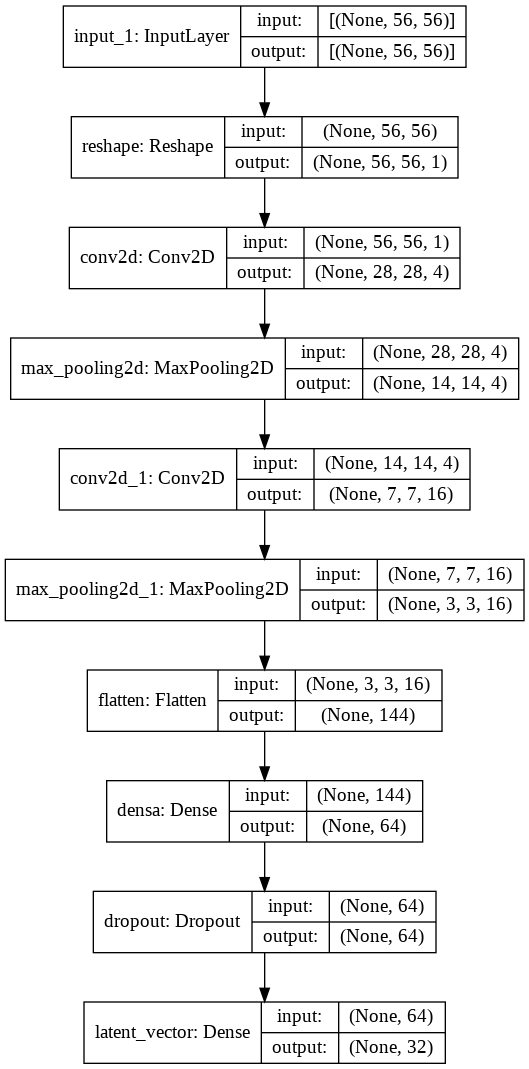

In [ ]:
from tensorflow.keras import utils
from tensorflow.keras.optimizers import RMSprop

model_ang.compile(loss='sparse_categorical_crossentropy', optimizer = 'Adam', metrics=['accuracy', 'mse'])
"""
optimizer=keras.optimizers.Adam(1e-4), 
        loss=keras.losses.SparseCategoricalCrossentropy(), 
        metrics=["accuracy"]
"""
model_ang.summary()
utils.plot_model(model_ang, show_shapes=True)

In [ ]:
epocas = 2

print(f'TRAIN: \nEn {epocas} épocas debe haber {round(num_batch*0.7)/epocas} steps_per_epoch')
print(f'TEST: \nEn {epocas} épocas debe haber {round(num_batch*0.3)/epocas} validation_steps')

TRAIN: 
En 2 épocas debe haber 9.0 steps_per_epoch
TEST: 
En 2 épocas debe haber 4.0 validation_steps


 `No gradients provided for any vaiable`: esto es porque el dataset.generator no esta entregando la tupla de (imagen, etiqueta)

Con el parámetro
<h1 style="color:blue;"> dataset.repeat()</h1>
Ya se puede uno olvidar de cuadrar los steps per epoc respecto a las epocas

In [ ]:
history = model_ang.fit(train_dataset, epochs= 1200,
                      validation_data= test_dataset, 
                      steps_per_epoch= round((num_batch*0.6)/epocas), 
                      validation_steps= round((num_batch*0.2)/epocas))
  #validation_steps= y steps_per_epoch= es fundamental para que no salga n/unknow en los pasos

Epoch 1/1200
8/8 [==============================] - 1s 104ms/step - loss: 3.5225 - accuracy: 0.0231 - mse: 325.1641 - val_loss: 3.4525 - val_accuracy: 0.0625 - val_mse: 352.0176
Epoch 2/1200
8/8 [==============================] - 0s 35ms/step - loss: 3.4614 - accuracy: 0.0531 - mse: 311.5408 - val_loss: 3.4467 - val_accuracy: 0.0365 - val_mse: 354.1289
Epoch 3/1200
8/8 [==============================] - 0s 33ms/step - loss: 3.4456 - accuracy: 0.0292 - mse: 314.3657 - val_loss: 3.4276 - val_accuracy: 0.0417 - val_mse: 357.7445
Epoch 4/1200
8/8 [==============================] - 0s 34ms/step - loss: 3.4279 - accuracy: 0.0477 - mse: 347.4227 - val_loss: 3.4182 - val_accuracy: 0.0625 - val_mse: 362.6983
Epoch 5/1200
8/8 [==============================] - 0s 33ms/step - loss: 3.4426 - accuracy: 0.0524 - mse: 320.1681 - val_loss: 3.4050 - val_accuracy: 0.0573 - val_mse: 293.9913
Epoch 6/1200
8/8 [==============================] - 0s 34ms/step - loss: 3.3831 - accuracy: 0.0614 - mse: 328.5107

In [ ]:
model_ang.evaluate(evaluate_dataset, steps=round((num_batch*0.2))) 

5/5 [==============================] - 0s 14ms/step - loss: 0.0600 - accuracy: 0.9844 - mse: 329.3536


[0.05998622253537178, 0.984375, 329.35357666015625]

In [ ]:
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Entrenamiento y validación '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

def list_confusion_matrix(cm,classes):
  df = pd.DataFrame(data = cm,
                    index = pd.MultiIndex.from_product([['Valor real'], classes]),
                    columns = pd.MultiIndex.from_product([['Valor predicho'], classes]))
  
  return df

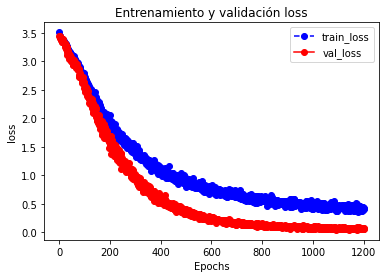

In [ ]:
plot_metric(history, 'loss')

## Melfrecuency
---

(100, 151)


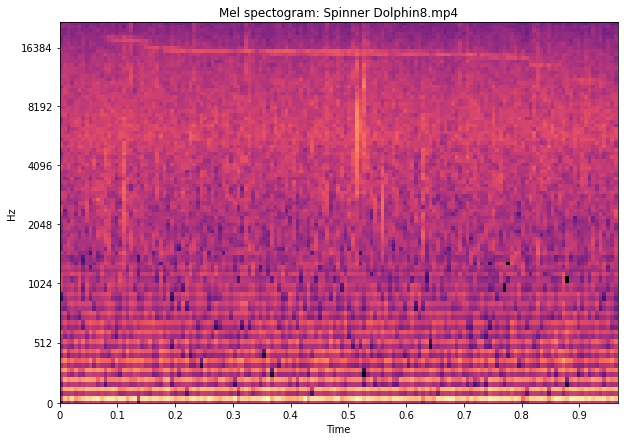

In [ ]:
from numpy.random import randint
# number of mel frequency bands 
n_mels = 100
fmin = 0            
fmax = 22050 # sample_rate/2
#angulos de complejos
hop_length = 512 #saltos
n_fft = 1024 # frame length 

n = randint(0, len(listdir))
audio_random = pathdir+listdir[n]

get_sr = librosa.get_samplerate(audio_random)
y, sr = librosa.load(audio_random, sr= get_sr, res_type='kaiser_fast')
mel_spec = librosa.feature.melspectrogram(y, n_fft=n_fft, hop_length=hop_length,
                                          n_mels=n_mels, sr= sr, power=1.0,
                                          fmin=fmin, fmax=fmax)
                                          
mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.max)

fig, ax = plt.subplots(1, 1, figsize=(10, 7))
img=librosa.display.specshow(mel_spec_db, x_axis='time',  y_axis='mel', 
                        sr=sr, hop_length=hop_length, 
                        fmin=fmin, fmax=fmax, ax=ax)
ax.set_title(f'Mel spectogram: {listdir[n]}')
print(mel_spec.shape)
ipd.Audio(y, rate=sr)

In [ ]:
n = randint(0, len(listdir))
audio_random = pathdir+listdir[n]

y, sr= librosa.load(audio_random, res_type='kaiser_fast')
mfccs=np.mean(librosa.feature.mfcc(y=y,sr=sr, n_mfcc=60).T,axis=0)
print(listdir[n])
mfccs.shape


Humpback Whale45.mp4


(60,)

para quitar 'Weddell Seal' y 'Leopard Seal'

In [ ]:
"""
new_list = []
for audio in listdir:
  split_name = re.split(r'(\d*\.)', audio, maxsplit=2)
  split_name[1] = int(re.sub(r'[\.]', '', split_name[1]))
  
  if split_name[0] != 'Weddell Seal' and split_name[0] != 'Leopard Seal':
    new_list.append(audio)
  else:
    continue 
    """

In [ ]:
#len(new_list)

1685

In [ ]:
"""
for i in l:
  if i == 'Weddell Seal1.mp4':
    print(f'hay un {i}')
  elif i == 'Leopard Seal1.mp4':
    print(f'hay un {i}')
    """

In [ ]:
"""
cetaceo = []
for i in range(0, len(listdir)):
  split_name = re.split(r'(\d*\.)', listdir[i], maxsplit=2)
  split_name[1] = int(re.sub(r'[\.]', '', split_name[1]))
  
  if split_name[0] != 'Weddell Seal' and split_name[0] != 'Leopard Seal':
    cetaceo.append(split_name[0])
  else:
    continue 
    """

In [ ]:
"""len(cetaceo)"""

1685

In [ ]:
""" for i in cetaceo:
  if i == 'Weddell Seal':
    print(f'hay un {i}')
  elif i == 'Leopard Seal':
    print(f'hay un {i}') """

In [ ]:
from sklearn import preprocessing

def generator():

  new_list = []
  for audio in listdir:
    split_name = re.split(r'(\d*\.)', audio, maxsplit=2)
    split_name[1] = int(re.sub(r'[\.]', '', split_name[1]))
  
    if split_name[0] != 'Weddell Seal' and split_name[0] != 'Leopard Seal':
      new_list.append(audio)
    else:
      continue 
  
  cetaceo = []
  for i in range(0, len(new_list)):

    split_name = re.split(r'(\d*\.)', new_list[i], maxsplit=2)
    split_name[1] = int(re.sub(r'[\.]', '', split_name[1]))
    cetaceo.append(split_name[0])

  etiquetas = preprocessing.LabelEncoder().fit_transform(cetaceo)

  for i in range(0, len(new_list)):
    get_sr = librosa.get_samplerate(pathdir+new_list[i])
    y, sr = librosa.load(pathdir+new_list[i], sr= get_sr)
    y, sr= librosa.load(pathdir+new_list[i], res_type='kaiser_fast')
    mfccs=np.mean(librosa.feature.mfcc(y=y,sr=sr, 
                                         n_mfcc=60).T,axis=0)
    #print(img_resize.shape, etiquetas[i].shape)
    print("@", end='')
    yield mfccs, etiquetas[i]


In [ ]:
it = iter(generator())
next(it)

@

(array([-3.3580353e+02,  1.7315790e+02, -3.3703514e+01,  3.6026989e+01,
         3.1196201e+00,  2.4385738e+01,  2.6894832e-01,  2.2915802e+01,
         2.5000959e+01, -1.2211843e+00,  2.0160120e+01, -3.2710853e+00,
         4.9092779e+00, -5.3143048e-01,  4.2580161e+00,  5.1219282e+00,
        -8.0189228e+00,  1.2116389e+01,  3.7796190e+00,  7.3546987e+00,
         2.2667128e-01, -2.5525162e+00,  3.8328443e+00, -4.2870212e+00,
         3.3772380e+00, -4.8071866e+00,  2.6264601e+00,  5.9253554e+00,
        -8.0141574e-02,  3.0408947e+00, -3.1423478e+00,  1.0784545e+00,
        -5.0005426e+00, -2.8356011e+00,  2.2082834e+00, -1.3591893e+00,
         4.6499677e+00,  1.0060979e+00, -1.1637244e+00, -4.6169109e+00,
        -3.6794829e+00,  8.0946863e-01, -3.3971875e+00, -3.2605776e-01,
         6.4162886e-01,  1.8219769e+00,  3.4443398e+00,  1.5538671e+00,
         3.4352107e+00, -5.0555956e-01, -3.8307042e+00, -3.7528186e+00,
        -3.4951134e+00, -1.0538976e+00, -3.1036150e+00, -3.65628

<font color='red'>¡Filtrado de datos de evaluación durante el entrenamiento!!</font>

Al definir el dataset y colcarle .shuffle() con el parámetro reshuffle_each_iteration=True:

<font color= 'red'> X Error</font>
```python
.shuffle(,reshuffle_each_iteration=True)
```
Se produce un filtrado de datos de evaluación al conjunto de entrenamiento; ya que si cada ves que entrene hace un re-barajamiento durante este, saldran algunos datos de evaluación y quedaran en el conjunto de train.

Para que esto no pase se debe colcar reshuffle_each_iteration=False:

<font color= 'green'> ✓ Correct</font>
```python
.shuffle(,reshuffle_each_iteration=False)
```

In [ ]:
######################
batch_size = 64
######################
print(f'número de batch: {round(len(listdir)/batch_size)} de tamaño {batch_size}')
dataset = tf.data.Dataset.from_generator(generator, output_signature=(tf.TensorSpec(shape= 60, 
                                                                       dtype=tf.float64), 
                                                                       tf.TensorSpec(shape=(), 
                                                                       dtype=tf.int32))).cache().shuffle(len(listdir), reshuffle_each_iteration=False).batch(batch_size)#.repeat() #shuffle si afecta la generación
                                                                                                                                  #reshuffle: cada ves que lo ejecutemos barajará diferente
                                                                                                                                  #cache(): sirve para no tenenr que generar todo de nuevo cada ves que se reinicie el generador
print(dataset.element_spec)                                                                                                                                  


número de batch: 27 de tamaño 64
(TensorSpec(shape=(None, 60), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))


In [ ]:
print(list(dataset.take(1).as_numpy_iterator())[0][0].shape) #shape de 1 solo batch sin etiquetas solo features
print(list(dataset.take(1).as_numpy_iterator())[0]) #una tupla (features, etiquetas) de un solo batch

(64, 60)
(array([[-2.38206680e+02,  1.03867882e+02, -1.90652573e+00, ...,
        -8.84150088e-01, -6.53067589e-01, -3.55163366e-01],
       [-8.02455368e+01,  9.40237503e+01, -1.00627174e+01, ...,
        -2.89345890e-01, -7.96393573e-01,  1.17307022e-01],
       [-1.16396713e+02,  7.22455292e+01, -9.69625473e+00, ...,
         6.86795354e-01, -1.44955981e+00, -3.68438214e-02],
       ...,
       [-2.98324402e+02, -1.85325745e+02, -3.86330490e+01, ...,
        -2.81373769e-01, -1.55536330e+00,  5.94049692e-01],
       [-5.58171143e+02,  5.72248421e+01,  5.57045441e+01, ...,
         1.13681543e+00,  9.60313916e-01,  7.16391683e-01],
       [-1.94958954e+02, -4.03682613e+00, -6.57206192e+01, ...,
         2.14002419e+00,  1.74715960e+00,  2.91185427e+00]]), array([21,  9, 14, 28,  6,  2, 18, 13, 12, 12, 18,  8, 17, 26, 11, 29, 22,
        9, 14,  9, 20, 24, 27, 27, 25,  7,  9, 19, 12, 26, 22,  4,  6, 28,
       11, 19, 29,  0, 11, 14, 22,  1,  4,  3, 16, 25,  0, 21, 12, 14, 14,
       

In [ ]:
num_batch = int(len(listdir)/batch_size)
print(len(listdir)/batch_size)
print(f'prueba 10%: take {round(num_batch*0.1)} batches') #10
print(f'val 10%: take {round(num_batch*0.1)} batches') #10
print(f'train 80%: take {round(num_batch*0.8)} batches') #80
num_batch_train = round(num_batch*0.8)
num_batch_val = round(num_batch*0.1)

train_dataset = dataset.take(num_batch_train)
test_dataset = dataset.skip(num_batch_train).take(num_batch_val)
evaluate_dataset = dataset.skip(num_batch_train + num_batch_val).take(num_batch_val)

#train_dataset = dataset.skip(num_batch_train)
print(test_dataset.element_spec) #shape de las etiquetas
print(train_dataset.element_spec)
print(evaluate_dataset.element_spec)

26.515625
prueba 10%: take 3 batches
val 10%: take 3 batches
train 80%: take 21 batches
(TensorSpec(shape=(None, 60), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
(TensorSpec(shape=(None, 60), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
(TensorSpec(shape=(None, 60), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))


In [ ]:
print(f'train_dataset batches: {len(list(train_dataset.as_numpy_iterator()))}')
print(f'test_dataset batches: {len(list(test_dataset.as_numpy_iterator()))}') 
print(f'evaluate_dataset batches: {len(list(evaluate_dataset.as_numpy_iterator()))}')#numero de batches

train_dataset batches: 21
test_dataset batches: 3
evaluate_dataset batches: 3


In [ ]:
#ahora hacemos que cada uno se repita indefinidamente para entrenar varias epochs
train_dataset  = train_dataset.repeat()
test_dataset = test_dataset.repeat()
evaluate_dataset = evaluate_dataset.repeat()

Un gran error de las anteriores redes fue el no haber usado en la entrada una **tangente hipérbolica**, dado que los valores de los audios tienen numero negativos, y al usa relu, esta ignora tales valores, por lo que el definir que función de activación usar en la entrad depende del tipo de datos y es crucial.

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras import layers, Input
from tensorflow.keras import utils

inputs=layers.Input(shape=(60,), name='Capa_inicial')

model_32M=layers.Activation('tanh')(inputs)

#model_32M=layers.Dense(64, activation='relu', name='Segunda_capa_oculta')(model_32M)
#model_32M= layers.Dropout(.4, name='Primera_capa_dropout')(model_32M)

model_32M=layers.Dense(784, activation='relu', name='Primera_capa_oculta')(model_32M)
model_32M= layers.Dropout(.8, name='new1_capa_dropout')(model_32M)

model_32M=layers.Dense(784, activation='relu', name='new_capa_oculta')(model_32M)
model_32M= layers.Dropout(.8, name='new_capa_dropout')(model_32M)

outputs=layers.Dense(30,name='Capa_de_salida')(model_32M)

model_32M=Model(inputs=inputs, outputs=outputs)

Model: "model_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Capa_inicial (InputLayer)    [(None, 60)]              0         
_________________________________________________________________
activation_30 (Activation)   (None, 60)                0         
_________________________________________________________________
Primera_capa_oculta (Dense)  (None, 784)               47824     
_________________________________________________________________
new1_capa_dropout (Dropout)  (None, 784)               0         
_________________________________________________________________
new_capa_oculta (Dense)      (None, 784)               615440    
_________________________________________________________________
new_capa_dropout (Dropout)   (None, 784)               0         
_________________________________________________________________
Capa_de_salida (Dense)       (None, 30)                235

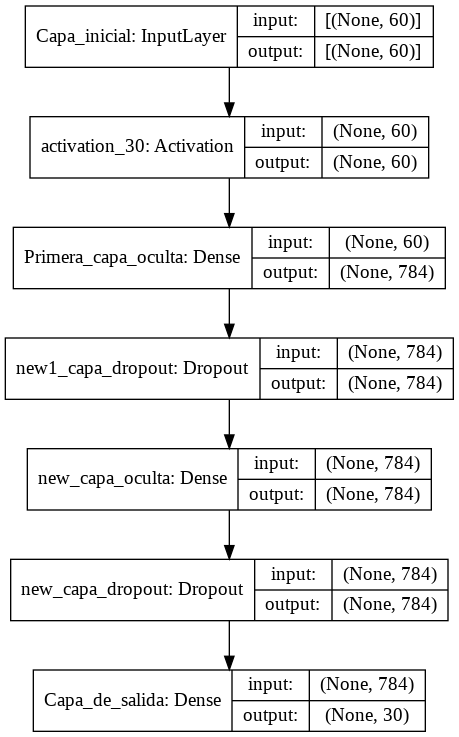

In [ ]:
from tensorflow.keras import utils
#from tensorflow.keras.optimizers import RMSprop

model_32M.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

model_32M.summary()
utils.plot_model(model_32M, show_shapes=True)

In [ ]:
epocas = 2

print(f'TRAIN: \nEn {epocas} épocas debe haber {round(num_batch*0.8)/epocas} steps_per_epoch')
print(f'TEST: \nEn {epocas} épocas debe haber {round(num_batch*0.1)/epocas} validation_steps')

TRAIN: 
En 2 épocas debe haber 10.5 steps_per_epoch
TEST: 
En 2 épocas debe haber 1.5 validation_steps


In [ ]:
history = model_32M.fit(train_dataset, epochs= 600,
                      validation_data= test_dataset, 
                      steps_per_epoch= round((num_batch*0.8)/epocas), 
                      validation_steps= round((num_batch*0.1)/epocas))
  #validation_steps= y steps_per_epoch= es fundamental para que no salga n/unknow en los pasos

Epoch 1/600
10/10 [==============================] - 1s 30ms/step - loss: 3.8105 - accuracy: 0.0681 - val_loss: 3.1548 - val_accuracy: 0.1875
Epoch 2/600
10/10 [==============================] - 0s 18ms/step - loss: 3.6445 - accuracy: 0.0412 - val_loss: 3.0446 - val_accuracy: 0.2812
Epoch 3/600
10/10 [==============================] - 0s 16ms/step - loss: 3.3005 - accuracy: 0.0993 - val_loss: 2.9411 - val_accuracy: 0.2812
Epoch 4/600
10/10 [==============================] - 0s 15ms/step - loss: 3.0156 - accuracy: 0.1582 - val_loss: 2.8199 - val_accuracy: 0.3125
Epoch 5/600
10/10 [==============================] - 0s 17ms/step - loss: 3.0432 - accuracy: 0.1890 - val_loss: 2.6952 - val_accuracy: 0.3281
Epoch 6/600
10/10 [==============================] - 0s 16ms/step - loss: 2.7776 - accuracy: 0.2401 - val_loss: 2.5733 - val_accuracy: 0.3438
Epoch 7/600
10/10 [==============================] - 0s 17ms/step - loss: 2.7059 - accuracy: 0.2178 - val_loss: 2.4683 - val_accuracy: 0.3281
Epoch 

KeyboardInterrupt: ignored

In [ ]:
model_32M.evaluate(evaluate_dataset, steps=round((num_batch*0.1))) 

3/3 [==============================] - 0s 4ms/step - loss: 1.3589 - accuracy: 0.7383


[1.3588730096817017, 0.7382550239562988]

In [ ]:
model_32M.save('/content/drive/MyDrive/Colab Notebooks/IA y AP/Proyecto/Cetaceos_dense.h5') #guardamos el modelo entrenado y evaluado

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
297,0.277078,0.906250,1.663572,0.656250,297
298,0.252230,0.926562,1.722113,0.625000,298
299,0.274469,0.910937,1.717183,0.640625,299
300,0.253417,0.909375,1.649465,0.625000,300
301,0.292405,0.898438,1.598609,0.640625,301


In [ ]:
hist[(hist['val_accuracy'] >= 0.83)] #las precisiones de validación más altas

,loss,accuracy,val_loss,val_accuracy,epoch


In [ ]:
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'b--')
    plt.plot(epochs, val_metrics, 'r-')
    plt.title('Entrenamiento y validación '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

def list_confusion_matrix(cm,classes):
  df = pd.DataFrame(data = cm,
                    index = pd.MultiIndex.from_product([['Valor real'], classes]),
                    columns = pd.MultiIndex.from_product([['Valor predicho'], classes]))
  
  return df

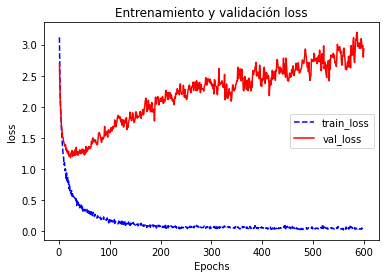

In [ ]:
plot_metric(history, 'loss')

In [ ]:
)

[10 21 24 23 13 10 12 21  2  7 22 16 11 26 20  9 11  9 15 28 14 27 27 12
 25  5 12 16 31 12  3 20  9 18 19 10 22 25 31  3  1 26  7 10 12 21 12  9
 26 25  5  1 26  6 20 17 26  0 17 20 11 26 11 23 30  8  4 26 26 22 18  1
 12  9  4 26 27 25  4 12 27 13  7 27  7  5 13  3  2 31 20 15 10  5  4  9
  4 20  0 15 21 27  5  9 26  9 11  6  3  4  8 16  4 28  0 20 11 30 22  4
 13 25 12  9 16 15 25 27 23 10 19 10 26  1 11  9 19 23 11 31 13 31  6 16
 21 15  7  9 27  8 19 19 27  2  7 25  7 12  9 27 25]
[10 21 24 31 13 18 12 21 21  7 16 16 11  9 20  9 11  9 15 28 14 27 27 12
 25  6 12 16 31 12 25 20  9 18 21 10 22 13 31 20  4 26  7 10 12 21 12  9
 10 25  5  1 18  6  3 17  6  0 17 20 11 26 11 23 30  8  4  9 26 22 18  1
 12 25  4 26 20 20 11 13 27  2  7 27 10 21  5  3  2 31 20 18 10 26  4  9
  4 20  0 15 23 27  5  9 26  9 11 27  3  1  8 16  4 28  0 20 11  5 22 19
 13 16 24  9 16  9 15 27 23  9 19 10  6 11 11  9 19 23 11  0 13  0  6  2
 21 15  7  9 27  8 12 19 27  2  7 25 23 12 27  5  5]


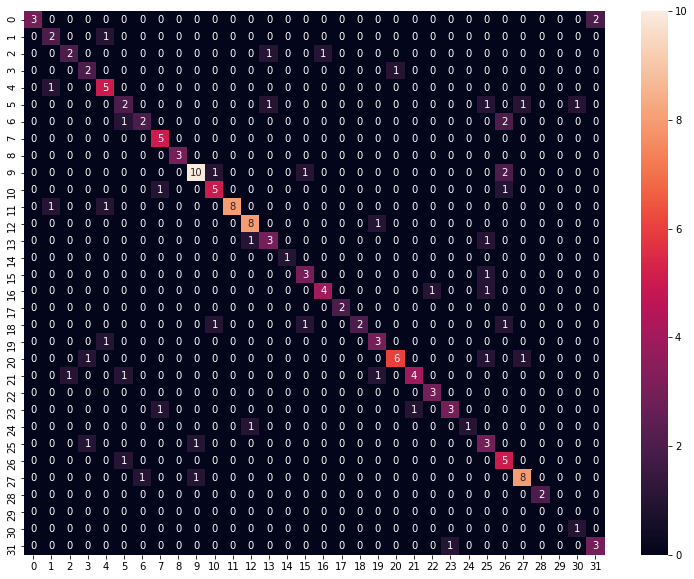

In [ ]:
from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay

y_pred = model_32M.predict(evaluate_dataset,
                          verbose=0, steps=3,
                          callbacks=None,
                          max_queue_size=10,
                          workers=1, use_multiprocessing=False)

y_pred_c = np.argmax(y_pred, axis=1)

y_real=[]
for i in range(0,3):
  y_real.append(list(evaluate_dataset.take(3).as_numpy_iterator())[i][1]) #itera en las tuplas (features, etiquetas) de 3 batches

y_real= np.concatenate((y_real[0], y_real[1], y_real[2]), axis=0)
print(y_pred_c)
print(y_real)

cm = confusion_matrix(y_real, y_pred_c, labels=range(0, 32))
fig, ax = plt.subplots(1,1, figsize=(13, 10))
sns.heatmap(cm, annot=True, ax=ax);

In [ ]:
def dict_label2encoded(listdir):
  cetaceo = []
  for i in range(0, len(listdir)):
    split_name = re.split(r'(\d*\.)', listdir[i], maxsplit=2)
    split_name[1] = int(re.sub(r'[\.]', '', split_name[1]))
    cetaceo.append(split_name[0])

  Lable_encoder = preprocessing.LabelEncoder().fit(cetaceo)
  mat_labels = {i: name for i, name in enumerate(Lable_encoder.inverse_transform(range(0, 32)))}
  return mat_labels

In [ ]:
print(dict_label2encoded(listdir), end=',')

{0: 'Atlantic Spotted Dolphin', 1: 'Bearded Seal', 2: 'Beluga, White Whale', 3: 'Bottlenose Dolphin', 4: 'Bowhead Whale', 5: 'Clymene Dolphin', 6: 'Common Dolphin', 7: 'False Killer Whale', 8: 'Fin, Finback Whale', 9: "Fraser's Dolphin", 10: "Grampus, Risso's Dolphin", 11: 'Harp Seal', 12: 'Humpback Whale', 13: 'Killer Whale', 14: 'Leopard Seal', 15: 'Long-Finned Pilot Whale', 16: 'Melon Headed Whale', 17: 'Minke Whale', 18: 'Narwhal', 19: 'Northern Right Whale', 20: 'Pantropical Spotted Dolphin', 21: 'Ross Seal', 22: 'Rough-Toothed Dolphin', 23: 'Short-Finned (Pacific) Pilot Whale', 24: 'Southern Right Whale', 25: 'Sperm Whale', 26: 'Spinner Dolphin', 27: 'Striped Dolphin', 28: 'Walrus', 29: 'Weddell Seal', 30: 'White-beaked Dolphin', 31: 'White-sided Dolphin'},

In [ ]:
#pd.DataFrame(dict_label2encoded(listdir).keys(), rows=dict_label2encoded(listdir).values())
hola = pd.DataFrame(dict_label2encoded(listdir).items(), columns=['Encoded', 'Cetáceo'])
hola['diag_cm'] = cm.diagonal()
hola

,Encoded,Cetáceo,diag_cm
0,0,Atlantic Spotted Dolphin,3
1,1,Bearded Seal,2
2,2,"Beluga, White Whale",2
3,3,Bottlenose Dolphin,2
4,4,Bowhead Whale,5
5,5,Clymene Dolphin,2
6,6,Common Dolphin,2
7,7,False Killer Whale,5
8,8,"Fin, Finback Whale",3
9,9,Fraser's Dolphin,10


In [ ]:
dict_label2encoded(listdir).keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

## melfrecuency conv

In [24]:
import cv2 as cv

In [29]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

#########################
img_size = (560, 60) #tamaño de las imagenes
#########################
def generator():
  """
  new_list = []
  for audio in listdir:
    split_name = re.split(r'(\d*\.)', audio, maxsplit=2)
    split_name[1] = int(re.sub(r'[\.]', '', split_name[1]))
  
    if split_name[0] != 'Weddell Seal' and split_name[0] != 'Leopard Seal':
      new_list.append(audio)
    else:
      continue 
  """
  new_list = listdir

  cetaceo = []
  for i in range(0, len(new_list)):

    split_name = re.split(r'(\d*\.)', new_list[i], maxsplit=2)
    split_name[1] = int(re.sub(r'[\.]', '', split_name[1]))
    cetaceo.append(split_name[0])

  etiquetas = preprocessing.LabelEncoder().fit_transform(cetaceo)

  for i in range(0, len(new_list)):
    get_sr = librosa.get_samplerate(pathdir+new_list[i])
    y, sr = librosa.load(pathdir+new_list[i], sr= get_sr, res_type='kaiser_fast')
    mfccs=librosa.feature.mfcc(y=y,sr=sr, n_mfcc=60)
    sc = StandardScaler().fit_transform(mfccs)
    img_resize = cv.resize(sc, img_size,
                           interpolation = cv.INTER_CUBIC)
    #print(img_resize.shape, etiquetas[i].shape)
    print("@", end='')
    yield img_resize, etiquetas[i]


In [33]:
it = iter(generator())
next(it)

@

(array([[-6.9514046e+00, -6.9623771e+00, -6.9843783e+00, ...,
         -7.0070930e+00, -6.9939356e+00, -6.9864764e+00],
        [ 3.0220327e+00,  3.0052660e+00,  2.9732673e+00, ...,
          2.9738650e+00,  2.9927948e+00,  3.0054290e+00],
        [ 2.4539034e-01,  2.2963171e-01,  1.8748692e-01, ...,
          4.6332958e-01,  4.8315635e-01,  4.9680138e-01],
        ...,
        [ 5.4067709e-02,  4.8050769e-02,  3.7765782e-02, ...,
          4.1198704e-02,  4.9788140e-02,  5.2559830e-02],
        [-1.9309573e-02, -1.4635828e-02, -6.1789751e-03, ...,
          4.5080572e-02,  4.6278454e-02,  4.6222616e-02],
        [-2.7954325e-02, -2.6017277e-02, -2.4146564e-02, ...,
          8.1340834e-02,  5.7316631e-02,  4.5482360e-02]], dtype=float32), 12)

In [34]:
print(next(it)[0].shape)

@(60, 560)


In [35]:
######################
batch_size = 64
######################
print(f'número de batch: {round(len(listdir)/batch_size)} de tamaño {batch_size}')
dataset = tf.data.Dataset.from_generator(generator, output_signature=(tf.TensorSpec(shape= (60, 560), 
                                                                       dtype=tf.float64), 
                                                                       tf.TensorSpec(shape=(), 
                                                                       dtype=tf.int32))).cache().shuffle(len(listdir), reshuffle_each_iteration=False).batch(batch_size)#.repeat() #shuffle si afecta la generación
                                                                                                                                  #reshuffle: cada ves que lo ejecutemos barajará diferente
                                                                                                                                  #cache(): sirve para no tenenr que generar todo de nuevo cada ves que se reinicie el generador
print(dataset.element_spec)                                                                                                                                  


número de batch: 27 de tamaño 64
(TensorSpec(shape=(None, 60, 560), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))


In [37]:
print(list(dataset.take(1).as_numpy_iterator())[0][0].shape) #shape de 1 solo batch sin etiquetas solo features
print(list(dataset.take(1).as_numpy_iterator())[0]) #una tupla (features, etiquetas) de un solo batch

(64, 60, 560)
(array([[[-7.49280071e+00, -7.49273825e+00, -7.49197912e+00, ...,
         -7.37479353e+00, -7.36989737e+00, -7.36949396e+00],
        [-1.31626487e+00, -1.31689119e+00, -1.32448840e+00, ...,
         -1.87882304e+00, -1.89596367e+00, -1.89737689e+00],
        [-8.92790854e-02, -8.97510126e-02, -9.54750478e-02, ...,
         -1.29908234e-01, -1.29293352e-01, -1.29242674e-01],
        ...,
        [ 7.30067194e-02,  7.31908530e-02,  7.54241869e-02, ...,
          1.32277593e-01,  1.25309840e-01,  1.24735467e-01],
        [ 1.33815601e-01,  1.33872226e-01,  1.34558961e-01, ...,
          3.27221304e-02,  2.55847964e-02,  2.49964464e-02],
        [ 1.22268103e-01,  1.22402772e-01,  1.24036044e-01, ...,
          1.50714396e-02,  1.07247597e-02,  1.03664491e-02]],

       [[-7.54154587e+00, -7.54051781e+00, -7.53695393e+00, ...,
         -7.34651184e+00, -7.35552120e+00, -7.35745382e+00],
        [ 1.21114910e+00,  1.22664237e+00,  1.27343082e+00, ...,
          7.41113663e-0

In [38]:
num_batch = int(len(listdir)/batch_size)
print(len(listdir)/batch_size)
print(f'prueba 10%: take {round(num_batch*0.1)} batches') #10
print(f'val 10%: take {round(num_batch*0.1)} batches') #10
print(f'train 80%: take {round(num_batch*0.8)} batches') #80
num_batch_train = round(num_batch*0.8)
num_batch_val = round(num_batch*0.1)

train_dataset = dataset.take(num_batch_train)
test_dataset = dataset.skip(num_batch_train).take(num_batch_val)
evaluate_dataset = dataset.skip(num_batch_train + num_batch_val).take(num_batch_val)

#train_dataset = dataset.skip(num_batch_train)
print(test_dataset.element_spec) #shape de las etiquetas
print(train_dataset.element_spec)
print(evaluate_dataset.element_spec)

26.515625
prueba 10%: take 3 batches
val 10%: take 3 batches
train 80%: take 21 batches
(TensorSpec(shape=(None, 60, 560), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
(TensorSpec(shape=(None, 60, 560), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
(TensorSpec(shape=(None, 60, 560), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))


In [39]:
print(f'train_dataset batches: {len(list(train_dataset.as_numpy_iterator()))}')
print(f'test_dataset batches: {len(list(test_dataset.as_numpy_iterator()))}') 
print(f'evaluate_dataset batches: {len(list(evaluate_dataset.as_numpy_iterator()))}')#numero de batches

train_dataset batches: 21
test_dataset batches: 3
evaluate_dataset batches: 3


In [40]:
#ahora hacemos que cada uno se repita indefinidamente para entrenar varias epochs
train_dataset  = train_dataset.repeat()
test_dataset = test_dataset.repeat()
evaluate_dataset = evaluate_dataset.repeat()

In [311]:
from tensorflow.keras.models import Model
from tensorflow.keras import layers, Input
from tensorflow.keras import utils


inputs = Input(shape =img_size[::-1])
x = layers.Reshape((img_size[0], img_size[1], 1), input_shape=(500, 500))(inputs)
print(f'output inputs: {inputs.shape}')
#encoder
#input = 28 x 28 x 1 (wide and thin)
x = layers.Activation('tanh')(x)
conv1 = layers.Conv2D(4, (3, 3), activation='tanh', strides=(2, 2),padding='same')(x) 
print(f'output conv1: {conv1.shape}') #(None, 24, 24, 1)
max1 = layers.MaxPool2D(2,2)(conv1)
conv2 = layers.Conv2D(16, (3, 3), activation='tanh', strides=(2, 2),padding='same')(max1)
max2 = layers.MaxPool2D(2,2)(conv2)
print(f'output conv2: {conv2.shape}') #(None, 12, 12, 4)
conv3 = layers.Conv2D(32, (3, 3), activation='tanh', strides=(2, 2),padding='same')(max2)
max3 = layers.MaxPool2D(2,2)(conv3)
print(f'output conv3: {conv3.shape}') #(None, 3, 3, 32)
conv4 = layers.Conv2D(64, (3, 3), activation='tanh', strides=(2,2),padding='same')(max3) #2 x 2 x 64

# Save the shape to the decoder
shape = conv3.shape#.as_list()
print(f'output conv3: {shape}') #(None, 2, 2, 64)
flat = layers.Flatten()(conv4)#(max3)
print(f'output flat: {flat.shape}') #(None, 256
densa = layers.Dense(64, activation='tanh',name ='densa')(flat)
drop = layers.Dropout(0.6)(densa)
print(f'output densa: {densa.shape}')
encoded = layers.Dense(32, activation='softmax',name ='latent_vector')(drop) 
#la capa de salida debe ser del mismo tamaño de las etiquetas
print(f'output dense: {encoded.shape}')
modelconv_mel = Model(inputs, encoded, name ='encoder')

output inputs: (None, 60, 560)
output conv1: (None, 280, 30, 4)
output conv2: (None, 70, 8, 16)
output conv3: (None, 18, 2, 32)
output conv3: (None, 18, 2, 32)
output flat: (None, 320)
output densa: (None, 64)
output dense: (None, 32)


Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_38 (InputLayer)        [(None, 60, 560)]         0         
_________________________________________________________________
reshape_37 (Reshape)         (None, 560, 60, 1)        0         
_________________________________________________________________
activation_36 (Activation)   (None, 560, 60, 1)        0         
_________________________________________________________________
conv2d_147 (Conv2D)          (None, 280, 30, 4)        40        
_________________________________________________________________
max_pooling2d_112 (MaxPoolin (None, 140, 15, 4)        0         
_________________________________________________________________
conv2d_148 (Conv2D)          (None, 70, 8, 16)         592       
_________________________________________________________________
max_pooling2d_113 (MaxPoolin (None, 35, 4, 16)         0   

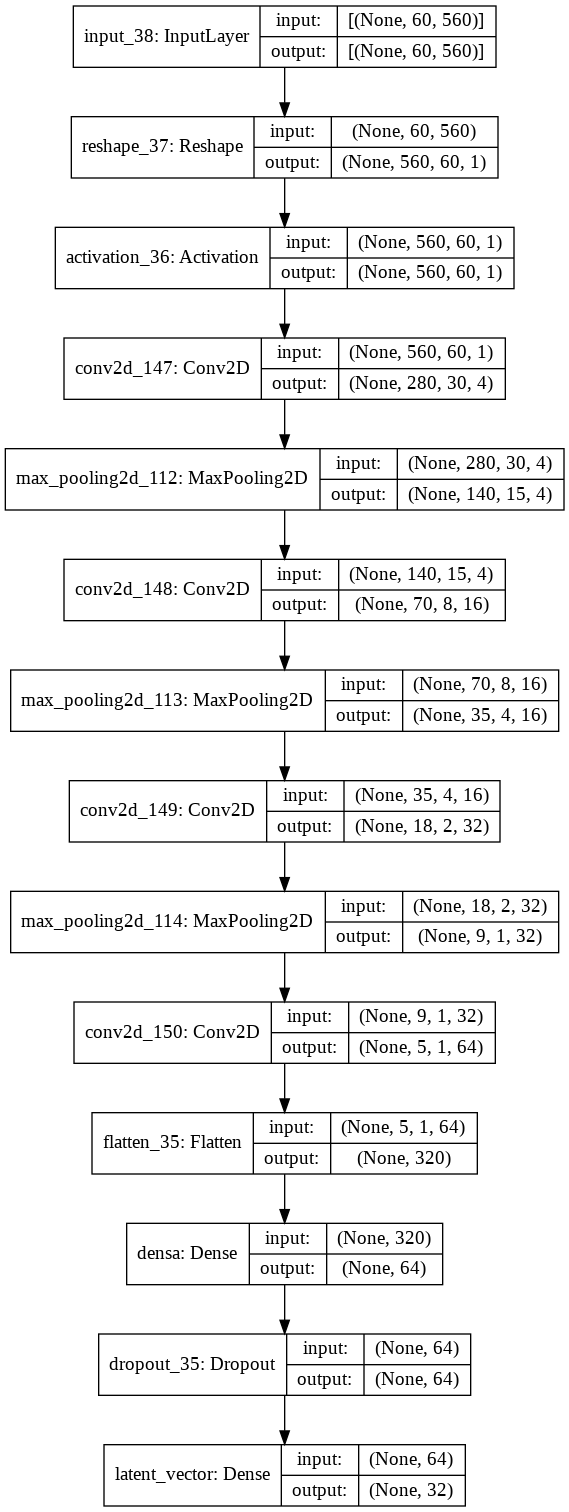

In [312]:
from tensorflow.keras import utils
#from tensorflow.keras.optimizers import RMSprop

modelconv_mel.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
modelconv_mel.summary()
utils.plot_model(modelconv_mel, show_shapes=True)

In [313]:
epocas = 2

print(f'TRAIN: \nEn {epocas} épocas debe haber {round(num_batch*0.8)/epocas} steps_per_epoch')
print(f'TEST: \nEn {epocas} épocas debe haber {round(num_batch*0.1)/epocas} validation_steps')

TRAIN: 
En 2 épocas debe haber 10.5 steps_per_epoch
TEST: 
En 2 épocas debe haber 1.5 validation_steps


In [314]:
history = modelconv_mel.fit(train_dataset, epochs= 170,
                      validation_data= test_dataset, 
                      steps_per_epoch= round((num_batch*0.8)/epocas), 
                      validation_steps= round((num_batch*0.1)/epocas))
  #validation_steps= y steps_per_epoch= es fundamental para que no salga n/unknow en los pasos

Epoch 1/170
10/10 [==============================] - 3s 213ms/step - loss: 3.4598 - accuracy: 0.0440 - val_loss: 3.4094 - val_accuracy: 0.1406
Epoch 2/170
10/10 [==============================] - 2s 250ms/step - loss: 3.4491 - accuracy: 0.0503 - val_loss: 3.3721 - val_accuracy: 0.1406
Epoch 3/170
10/10 [==============================] - 2s 197ms/step - loss: 3.3668 - accuracy: 0.0814 - val_loss: 3.2883 - val_accuracy: 0.1562
Epoch 4/170
10/10 [==============================] - 2s 189ms/step - loss: 3.2769 - accuracy: 0.0825 - val_loss: 3.1425 - val_accuracy: 0.2031
Epoch 5/170
10/10 [==============================] - 2s 189ms/step - loss: 3.1729 - accuracy: 0.1235 - val_loss: 3.0166 - val_accuracy: 0.1875
Epoch 6/170
10/10 [==============================] - 2s 190ms/step - loss: 3.0034 - accuracy: 0.1559 - val_loss: 2.8869 - val_accuracy: 0.2188
Epoch 7/170
10/10 [==============================] - 2s 188ms/step - loss: 2.9194 - accuracy: 0.1982 - val_loss: 2.7409 - val_accuracy: 0.2656

In [315]:
modelconv_mel.evaluate(evaluate_dataset, steps=round((num_batch*0.1))) 

3/3 [==============================] - 0s 81ms/step - loss: 0.6855 - accuracy: 0.8137


[0.685474693775177, 0.8136646151542664]

In [321]:
modelconv_mel.save('/content/drive/MyDrive/Colab Notebooks/IA y AP/Proyecto/Cetaceos_conv.h5') #guardamos el modelo entrenado y evaluado

In [308]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
165,0.254596,0.946875,0.586638,0.812500,165
166,0.257851,0.934375,0.591360,0.812500,166
167,0.263430,0.934375,0.575387,0.828125,167
168,0.275888,0.929688,0.583922,0.828125,168
169,0.250195,0.932813,0.581035,0.828125,169


In [309]:
hist[(hist['val_accuracy'] >= 0.8)] #las precisiones de validación más altas

,loss,accuracy,val_loss,val_accuracy,epoch
67,0.845361,0.765625,0.794897,0.812500,67
94,0.574513,0.843750,0.669540,0.812500,94
105,0.551151,0.842188,0.634680,0.828125,105
109,0.485989,0.871875,0.623092,0.812500,109
119,0.481799,0.856250,0.618712,0.812500,119
120,0.445087,0.881250,0.628077,0.812500,120
121,0.424526,0.875000,0.601970,0.828125,121
122,0.424020,0.881250,0.632342,0.812500,122
124,0.380405,0.895312,0.620130,0.828125,124
125,0.363353,0.901563,0.602913,0.828125,125


In [295]:
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'b--')
    plt.plot(epochs, val_metrics, 'r-')
    plt.title('Entrenamiento y validación '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

def list_confusion_matrix(cm,classes):
  df = pd.DataFrame(data = cm,
                    index = pd.MultiIndex.from_product([['Valor real'], classes]),
                    columns = pd.MultiIndex.from_product([['Valor predicho'], classes]))
  
  return df

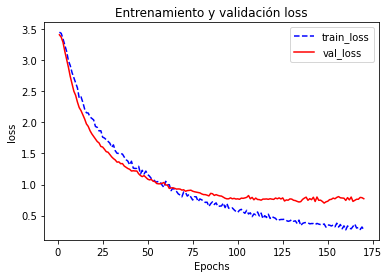

In [316]:
plot_metric(history, 'loss')

[30 23 27 28 21  1  4  5 26 27 10 28 26  8  9 16 15  4  0  8  8 27 25  0
 11 25 13 23 26 11 18 12  3 26 10 22  8 31 25  9 21 27 11 18  3 26 21 12
 13 12 14 23  0  4 16 15 25  4  1 27 28 19 15 26  9 28 30  4  8  7 27  1
 22 21 10 16 21 30  6 27  5  4  6 15 19 30  6 23  3 22 21  8  9 24  8 26
  3 26 26 27  2 23 27 31  6  2 16  8 19 27  7 17 23 16 10  8  1 22 31 11
 11  9  5  6 15  0 26  9 30 31 22 30  3 28  3  9 26  4 12 22 15 25 19 25
 25 19 22 11  7  1  3  5 25 31 20  7  9 28 15 31  5]
[30 23 27  8 21  4  4 25 26 27 10  4 26  8  9 11 15  4  0  8  8 27 28  0
 23 25 12 23 26 11 18  2  3 26 10 22  8 31 25  9 21 27 11 18  3 23 21 12
 13 12 14 23  0 28 20 15 25  4 12 27 28 19 15 26  9 28 30  4  8  7 27  4
 25 21  1 16 21 30  6 27  5 19  6 15  2 30  6 23  3 22 21  8  9 24  8 26
  3 26 26 27 19 23 27 31  6  2 16  8  4 27  7 17 10 16 10  8 18 22 31 19
 11  9 31 27 15  0 26  9 30 31 22 30 23 28  3 27 26  4 12 22 15 25 19 16
 25 19 22 11  7  1  3  5 25 31 23  7  9  2 15 31  5]


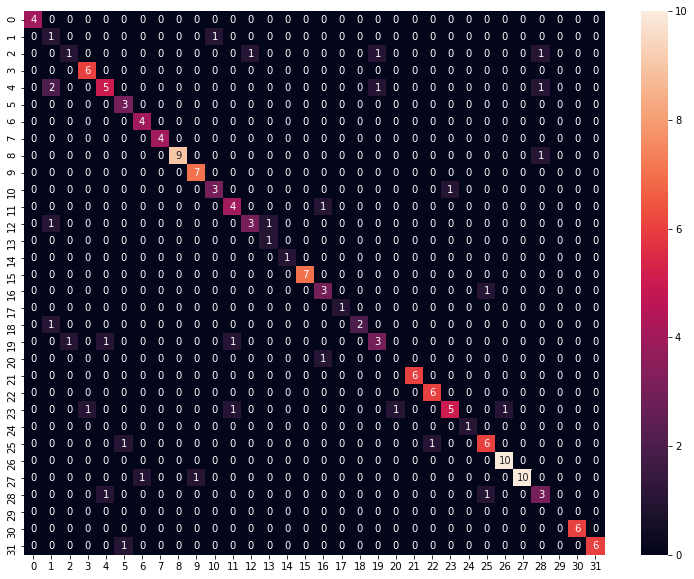

In [317]:
from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay

y_pred = modelconv_mel.predict(evaluate_dataset,
                          verbose=0, steps=3,
                          callbacks=None,
                          max_queue_size=10,
                          workers=1, use_multiprocessing=False)

y_pred_c = np.argmax(y_pred, axis=1)

y_real=[]
for i in range(0,3):
  y_real.append(list(evaluate_dataset.take(3).as_numpy_iterator())[i][1]) #itera en las tuplas (features, etiquetas) de 3 batches

y_real= np.concatenate((y_real[0], y_real[1], y_real[2]), axis=0)
print(y_pred_c)
print(y_real)

cm = confusion_matrix(y_real, y_pred_c, labels=range(0, 32))
fig, ax = plt.subplots(1,1, figsize=(13, 10))
sns.heatmap(cm, annot=True, ax=ax);

In [61]:
def dict_label2encoded(listdir):
  cetaceo = []
  for i in range(0, len(listdir)):
    split_name = re.split(r'(\d*\.)', listdir[i], maxsplit=2)
    split_name[1] = int(re.sub(r'[\.]', '', split_name[1]))
    cetaceo.append(split_name[0])

  Lable_encoder = preprocessing.LabelEncoder().fit(cetaceo)
  mat_labels = {i: name for i, name in enumerate(Lable_encoder.inverse_transform(range(0, 32)))}
  return mat_labels

In [318]:
print(dict_label2encoded(listdir), end=',')

{0: 'Atlantic Spotted Dolphin', 1: 'Bearded Seal', 2: 'Beluga, White Whale', 3: 'Bottlenose Dolphin', 4: 'Bowhead Whale', 5: 'Clymene Dolphin', 6: 'Common Dolphin', 7: 'False Killer Whale', 8: 'Fin, Finback Whale', 9: "Fraser's Dolphin", 10: "Grampus, Risso's Dolphin", 11: 'Harp Seal', 12: 'Humpback Whale', 13: 'Killer Whale', 14: 'Leopard Seal', 15: 'Long-Finned Pilot Whale', 16: 'Melon Headed Whale', 17: 'Minke Whale', 18: 'Narwhal', 19: 'Northern Right Whale', 20: 'Pantropical Spotted Dolphin', 21: 'Ross Seal', 22: 'Rough-Toothed Dolphin', 23: 'Short-Finned (Pacific) Pilot Whale', 24: 'Southern Right Whale', 25: 'Sperm Whale', 26: 'Spinner Dolphin', 27: 'Striped Dolphin', 28: 'Walrus', 29: 'Weddell Seal', 30: 'White-beaked Dolphin', 31: 'White-sided Dolphin'},

In [319]:
#pd.DataFrame(dict_label2encoded(listdir).keys(), rows=dict_label2encoded(listdir).values())
hola = pd.DataFrame(dict_label2encoded(listdir).items(), columns=['Encoded', 'Cetáceo'])
hola['diag_cm'] = cm.diagonal()
hola

,Encoded,Cetáceo,diag_cm
0,0,Atlantic Spotted Dolphin,4
1,1,Bearded Seal,1
2,2,"Beluga, White Whale",1
3,3,Bottlenose Dolphin,6
4,4,Bowhead Whale,5
5,5,Clymene Dolphin,3
6,6,Common Dolphin,4
7,7,False Killer Whale,4
8,8,"Fin, Finback Whale",9
9,9,Fraser's Dolphin,7


In [320]:
from sklearn.metrics import classification_report

report = classification_report(y_real, y_pred_c, digits= 4)
print(report)

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000         4
           1     0.2000    0.5000    0.2857         2
           2     0.5000    0.2500    0.3333         4
           3     0.8571    1.0000    0.9231         6
           4     0.7143    0.5556    0.6250         9
           5     0.6000    1.0000    0.7500         3
           6     0.8000    1.0000    0.8889         4
           7     1.0000    1.0000    1.0000         4
           8     1.0000    0.9000    0.9474        10
           9     0.8750    1.0000    0.9333         7
          10     0.7500    0.7500    0.7500         4
          11     0.6667    0.8000    0.7273         5
          12     0.7500    0.6000    0.6667         5
          13     0.5000    1.0000    0.6667         1
          14     1.0000    1.0000    1.0000         1
          15     1.0000    1.0000    1.0000         7
          16     0.6000    0.7500    0.6667         4
          17     1.0000    

# Conclusiones
---

La red densa tuvo problemas para detectar:

1. los audios con menos ejemplos como Weddell Seal, Leopard Seal etc.
2. los audios con más ruido.	